In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json
import glob
import pandas as pd
import numpy as np
import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import time
import calendar
import codecs
import datetime
import sys
import string
import os

In [2]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    return contains_column

In [3]:
mydata = pd.read_json("replace_positive_i.json", lines=True)

In [4]:
import re
corpus = []
for i in range(0, 139018):
    review = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', str(mydata['text'][i]), flags=re.MULTILINE)
    #review = re.sub(r'\bpositive', 'infected', str(mydata['text'][i]))
    #review = review.lower()
    #review = review.split()
    #ps = PorterStemmer()
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str(mydata['text'][i])).split())
    #review = ' '.join(re.sub("tested+positive","tested+sick",str(mydata['text'][i])).split())
    #review = ' '.join(review)
    corpus.append(review)
    
mydata['preprocessed'] = corpus

In [5]:
mydata.head(5)

,created_at,screen_name,text,preprocessed
0,2020-01-26 15:39:59+00:00,gogoyout,"https://t.co/BWFp76JUC4 Some 5,000 cruise pass...",Some 5 000 cruise passengers and 1 200 crew sc...
1,2020-01-27 16:11:47+00:00,removalman123,Las Vegas gambles on new slogan; cruise lines ...,Las Vegas gambles on new slogan cruise lines t...
2,2020-01-27 16:22:45+00:00,jackhough,"Based on China exposure for @RoyalCaribbean, U...",Based on China exposure for UBS theorizes that...
3,2020-01-27 16:30:33+00:00,leisurenewswire,Rampant Spread of Coronavirus Leads to More Ev...,Rampant Spread of Coronavirus Leads to More Ev...
4,2020-01-27 16:30:33+00:00,LeisurePRnews,Rampant Spread of Coronavirus Leads to More Ev...,Rampant Spread of Coronavirus Leads to More Ev...


In [6]:
# Print created_at to see the original format of datetime in Twitter data
print(mydata['created_at'].head())

# Convert the created_at column to np.datetime object
mydata['created_at'] = pd.to_datetime(mydata['created_at'])

# Print created_at to see new format
print(mydata['created_at'].head())

# Set the index of ds_tweets to created_at
mydata = mydata.set_index('created_at')

0   2020-01-26 15:39:59+00:00
1   2020-01-27 16:11:47+00:00
2   2020-01-27 16:22:45+00:00
3   2020-01-27 16:30:33+00:00
4   2020-01-27 16:30:33+00:00
Name: created_at, dtype: datetime64[ns, UTC]
0   2020-01-26 15:39:59+00:00
1   2020-01-27 16:11:47+00:00
2   2020-01-27 16:22:45+00:00
3   2020-01-27 16:30:33+00:00
4   2020-01-27 16:30:33+00:00
Name: created_at, dtype: datetime64[ns, UTC]


In [7]:
df = pd.DataFrame(mydata)

In [8]:
mydata.head(2)

,screen_name,text,preprocessed
created_at,,,
2020-01-26 15:39:59+00:00,gogoyout,"https://t.co/BWFp76JUC4 Some 5,000 cruise pass...",Some 5 000 cruise passengers and 1 200 crew sc...
2020-01-27 16:11:47+00:00,removalman123,Las Vegas gambles on new slogan; cruise lines ...,Las Vegas gambles on new slogan cruise lines t...


In [9]:
def check_word_in_preprocessed(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['preprocessed'].str.contains(word, case = False)
    return contains_column

In [10]:
# Create a cruise and preprocessed column
mydata['cruise'] = check_word_in_tweet('cruise', mydata)
mydata['pre_cruise'] = check_word_in_preprocessed('cruise', mydata)

# Create a cruising and preprocessed column
mydata['cruising'] = check_word_in_tweet('cruising', mydata)
mydata['pre_cruising'] = check_word_in_preprocessed('cruising', mydata)

# Average of cruise column by day
mean_cruise = mydata['cruise'].resample('D').mean()
#total_cruise = df.groupby('cruise').text.count()

# Average of cruising column by day
mean_cruising = mydata['cruising'].resample('D').mean()
#total_cruising = df.groupby('cruising').text.count()

# Sum of cruise column by day
sum_cruise = mydata['cruise'].resample('D').sum()
pre_sum_cruise = mydata['pre_cruise'].resample('D').sum()

# Sum of cruisisng column by day
sum_cruising = mydata['cruising'].resample('D').sum()
pre_sum_cruising = mydata['pre_cruising'].resample('D').sum()

In [11]:
total_sum_cruise = sum_cruise + sum_cruising
total_presum_cruise = pre_sum_cruise + pre_sum_cruising

print(np.sum(total_sum_cruise))
print(np.sum(total_presum_cruise))

139462
137613


<AxesSubplot:title={'center':'By Day'}, xlabel='created_at'>

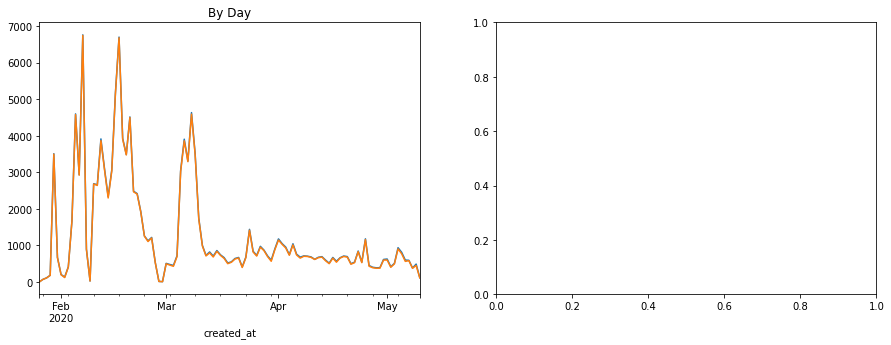

In [12]:
#plt.plot(sum_cruise.index.day, sum_cruise, color = 'green')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
(total_sum_cruise.plot(ax=axes[0], title = "By Day", legend = False)); 
total_presum_cruise.plot(ax=axes[0], title = "By Day", legend = False)

In [13]:
mydata.head(2)

,screen_name,text,preprocessed,cruise,pre_cruise,cruising,pre_cruising
created_at,,,,,,,
2020-01-26 15:39:59+00:00,gogoyout,"https://t.co/BWFp76JUC4 Some 5,000 cruise pass...",Some 5 000 cruise passengers and 1 200 crew sc...,True,True,False,False
2020-01-27 16:11:47+00:00,removalman123,Las Vegas gambles on new slogan; cruise lines ...,Las Vegas gambles on new slogan cruise lines t...,True,True,False,False


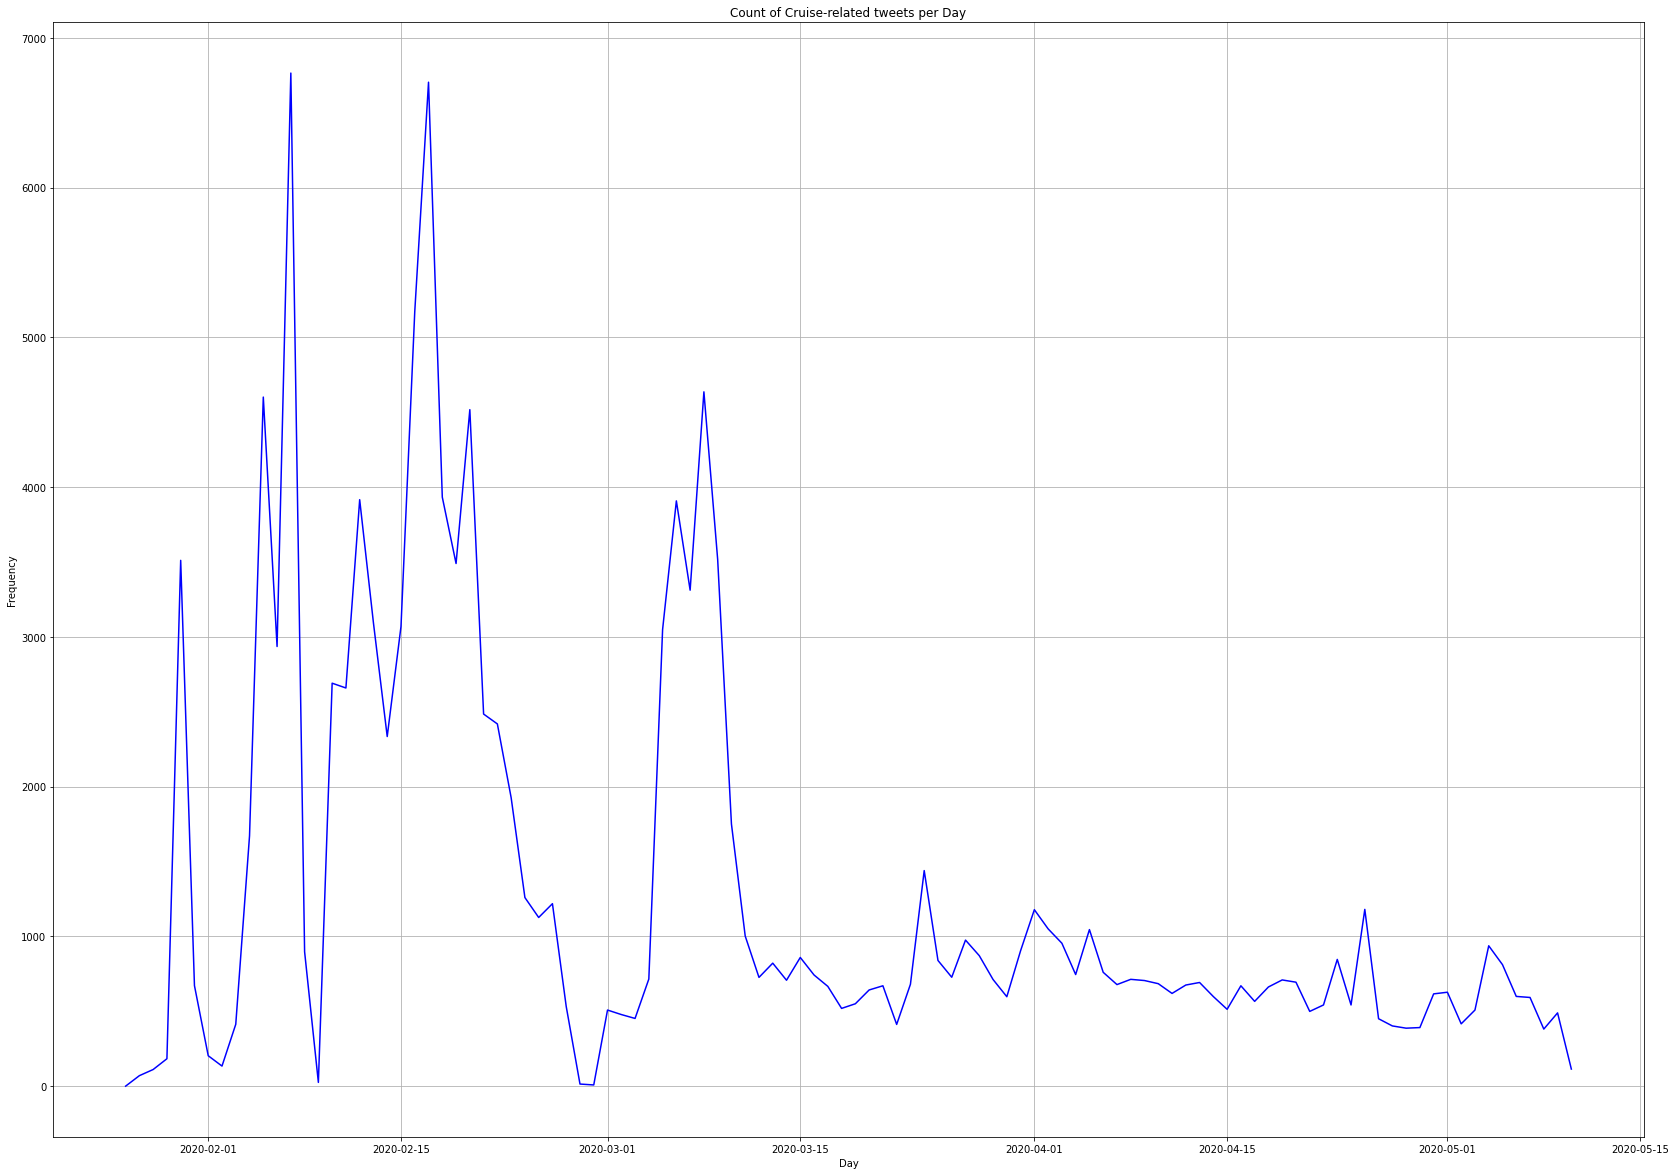

In [14]:
# Plot mean python by day(green)/mean rstats by day(blue)
fig, ax = plt.subplots()
fig.set_size_inches(28.5,20.5)

plt.plot(total_sum_cruise, color = 'blue')
#plt.plot(total_cruising.index.day, total_cruising, color = 'blue')

# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Count of Cruise-related tweets per Day')
plt.grid(b=True, which=u'major')


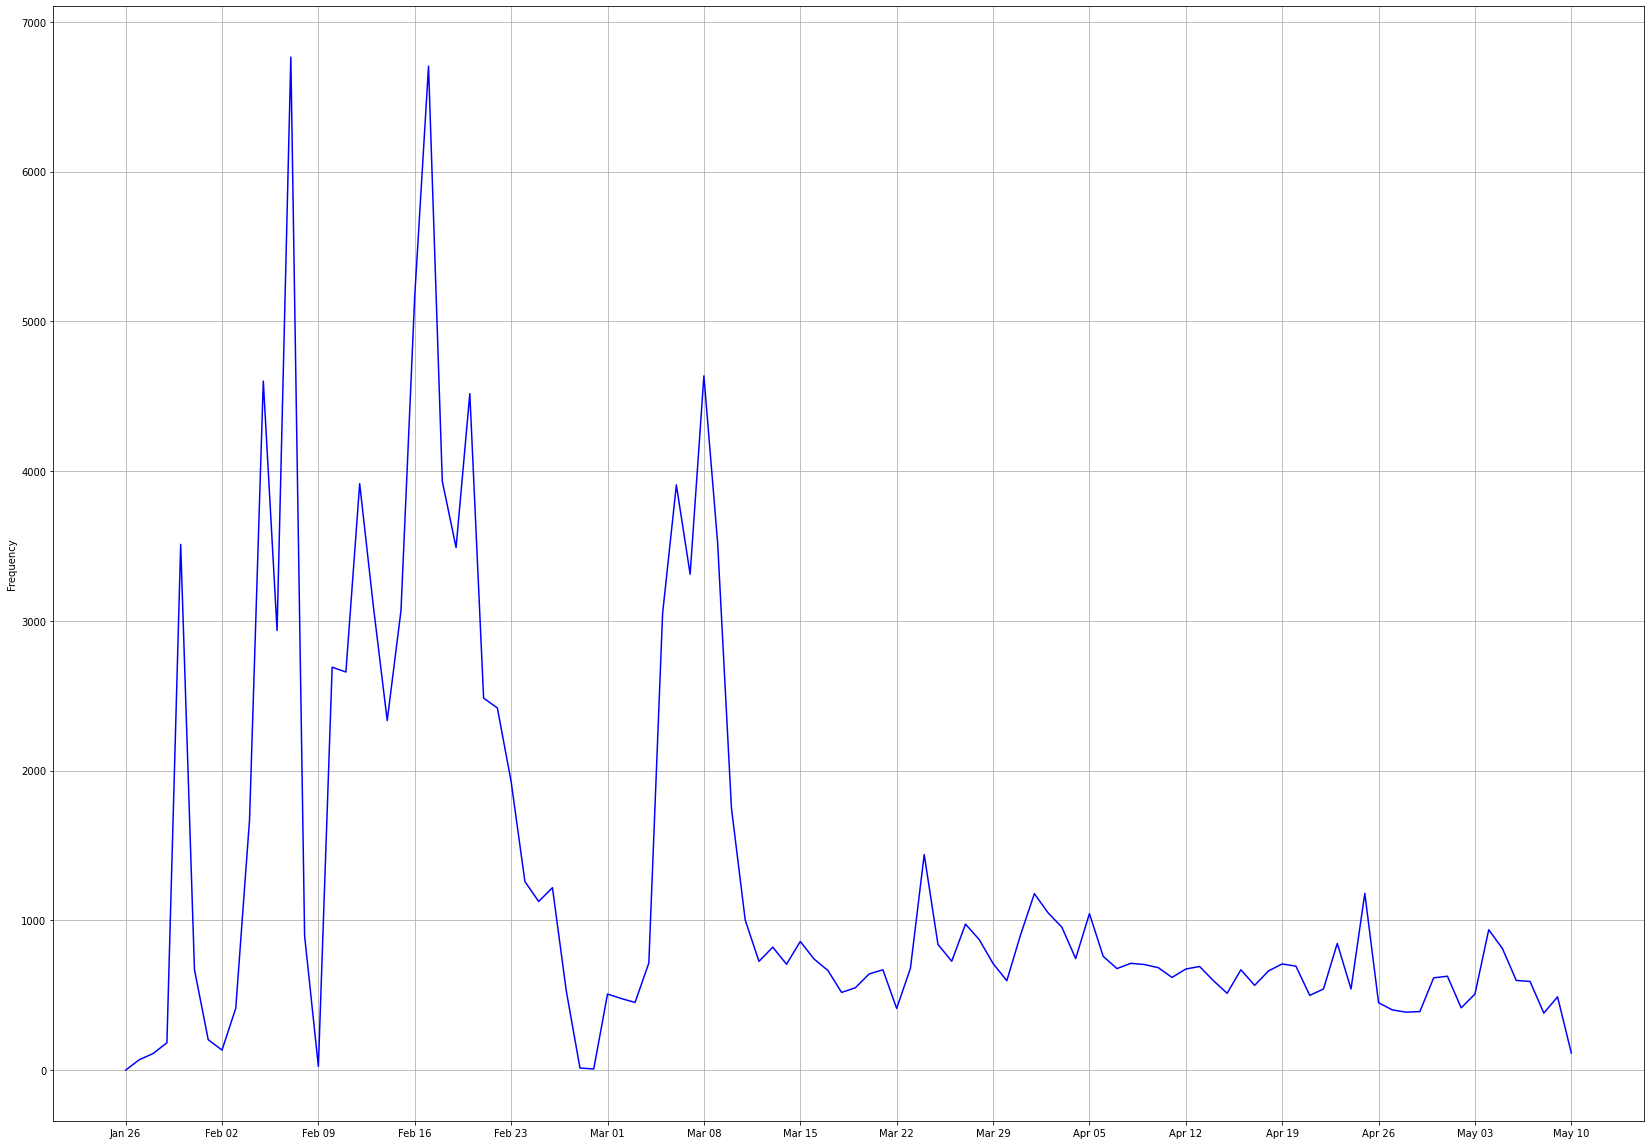

In [15]:
# Plot mean python by day(green)/mean rstats by day(blue)
fig, ax = plt.subplots()
fig.set_size_inches(28.5,20.5)

plt.plot(total_sum_cruise, color = 'blue')
 
plt.ylabel('Frequency')
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# # Make sure df & mydata have date as index before running sentiment to avoid error

In [16]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = df['text'].apply(sid.polarity_scores)
pre_sentiment_scores = df['preprocessed'].apply(sid.polarity_scores)

In [17]:
sentiment = sentiment_scores.apply(lambda x: x['compound'])
pre_sentiment = pre_sentiment_scores.apply(lambda x: x['compound'])

sentiment_cruise = sentiment[check_word_in_tweet('cruise', mydata)].resample('D').mean()
pre_sentiment_cruise = pre_sentiment[check_word_in_preprocessed('cruise', mydata)].resample('D').mean()

In [18]:
#may not need to run
mydata['crosscheck'] = pre_sentiment

In [19]:
mydata.head()

,screen_name,text,preprocessed,cruise,pre_cruise,cruising,pre_cruising,crosscheck
created_at,,,,,,,,
2020-01-26 15:39:59+00:00,gogoyout,"https://t.co/BWFp76JUC4 Some 5,000 cruise pass...",Some 5 000 cruise passengers and 1 200 crew sc...,True,True,False,False,-0.3182
2020-01-27 16:11:47+00:00,removalman123,Las Vegas gambles on new slogan; cruise lines ...,Las Vegas gambles on new slogan cruise lines t...,True,True,False,False,0.4215
2020-01-27 16:22:45+00:00,jackhough,"Based on China exposure for @RoyalCaribbean, U...",Based on China exposure for UBS theorizes that...,True,False,False,False,-0.3612
2020-01-27 16:30:33+00:00,leisurenewswire,Rampant Spread of Coronavirus Leads to More Ev...,Rampant Spread of Coronavirus Leads to More Ev...,True,True,False,False,0.0000
2020-01-27 16:30:33+00:00,LeisurePRnews,Rampant Spread of Coronavirus Leads to More Ev...,Rampant Spread of Coronavirus Leads to More Ev...,True,True,False,False,0.0000


In [20]:
# don't run again
mydata.to_csv('crosscheck.csv')

# Overlay sentiment plot of unprocessed & pre-processed tweets

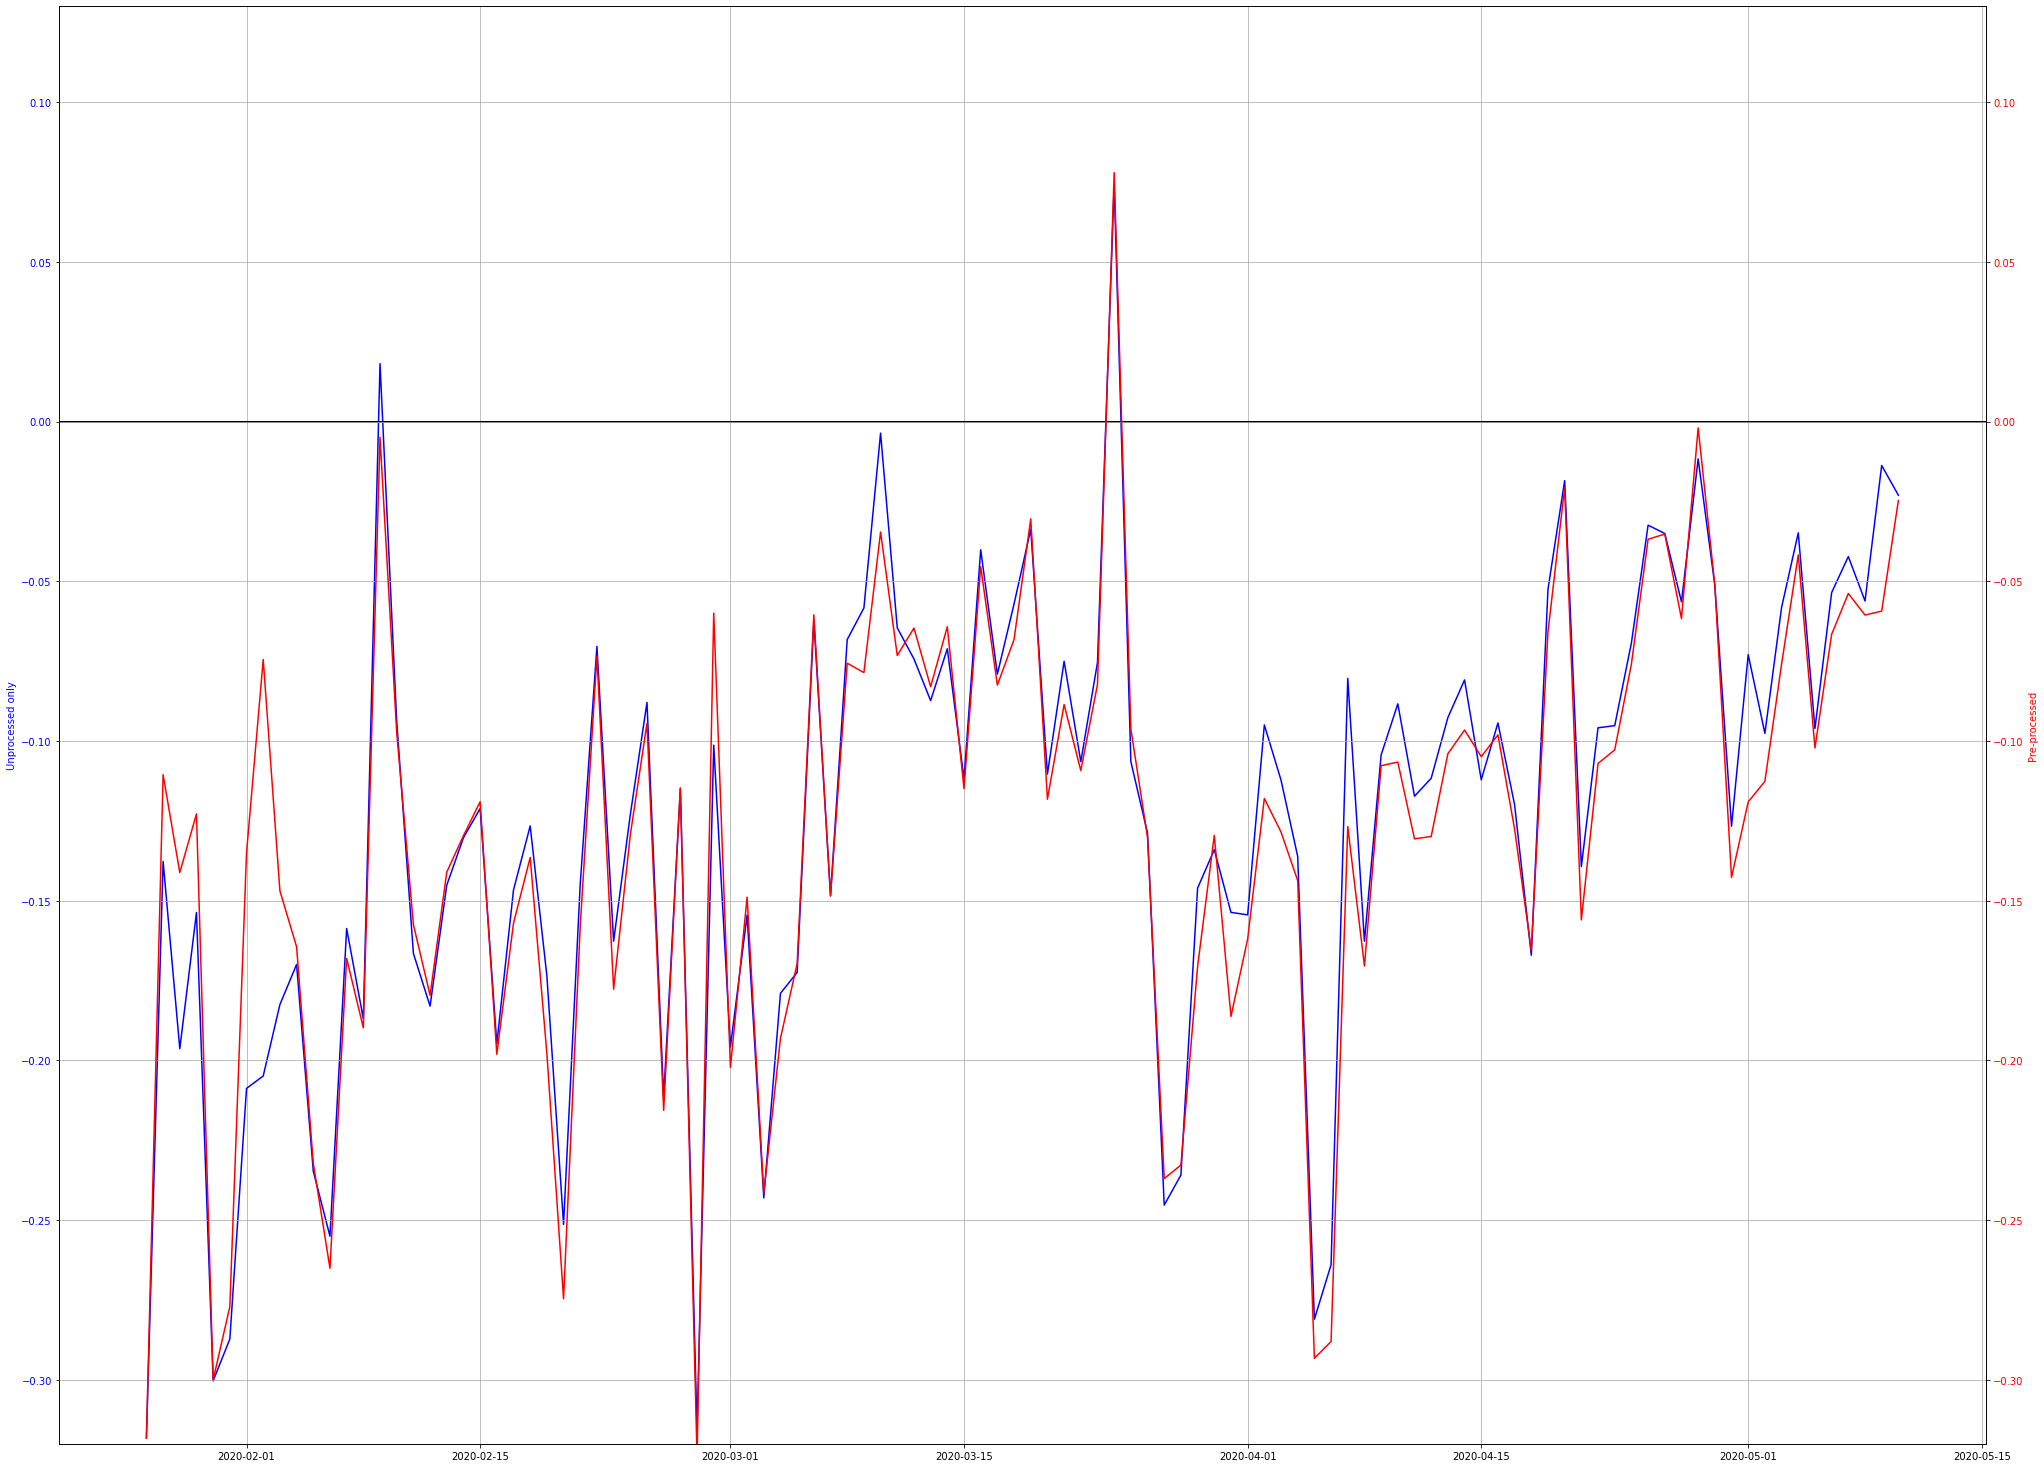

In [20]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

i = sentiment_cruise
j = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Unprocessed only', color=color)
ax1.plot(i, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-.32,.13)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Pre-processed', color=color)  # we already handled the x-label with ax1
ax2.plot(j, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-.32,.13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

ax1.axhline(0, color ='black', lw = 2) 
#ax1.set_ylim(-1,.13)
ax1.xaxis.grid(True, which='major')
#ax1.xaxis.set_minor_locator(AutoMinorLocator(7))

ax.tick_params(which='both', width=7)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7, color='r')

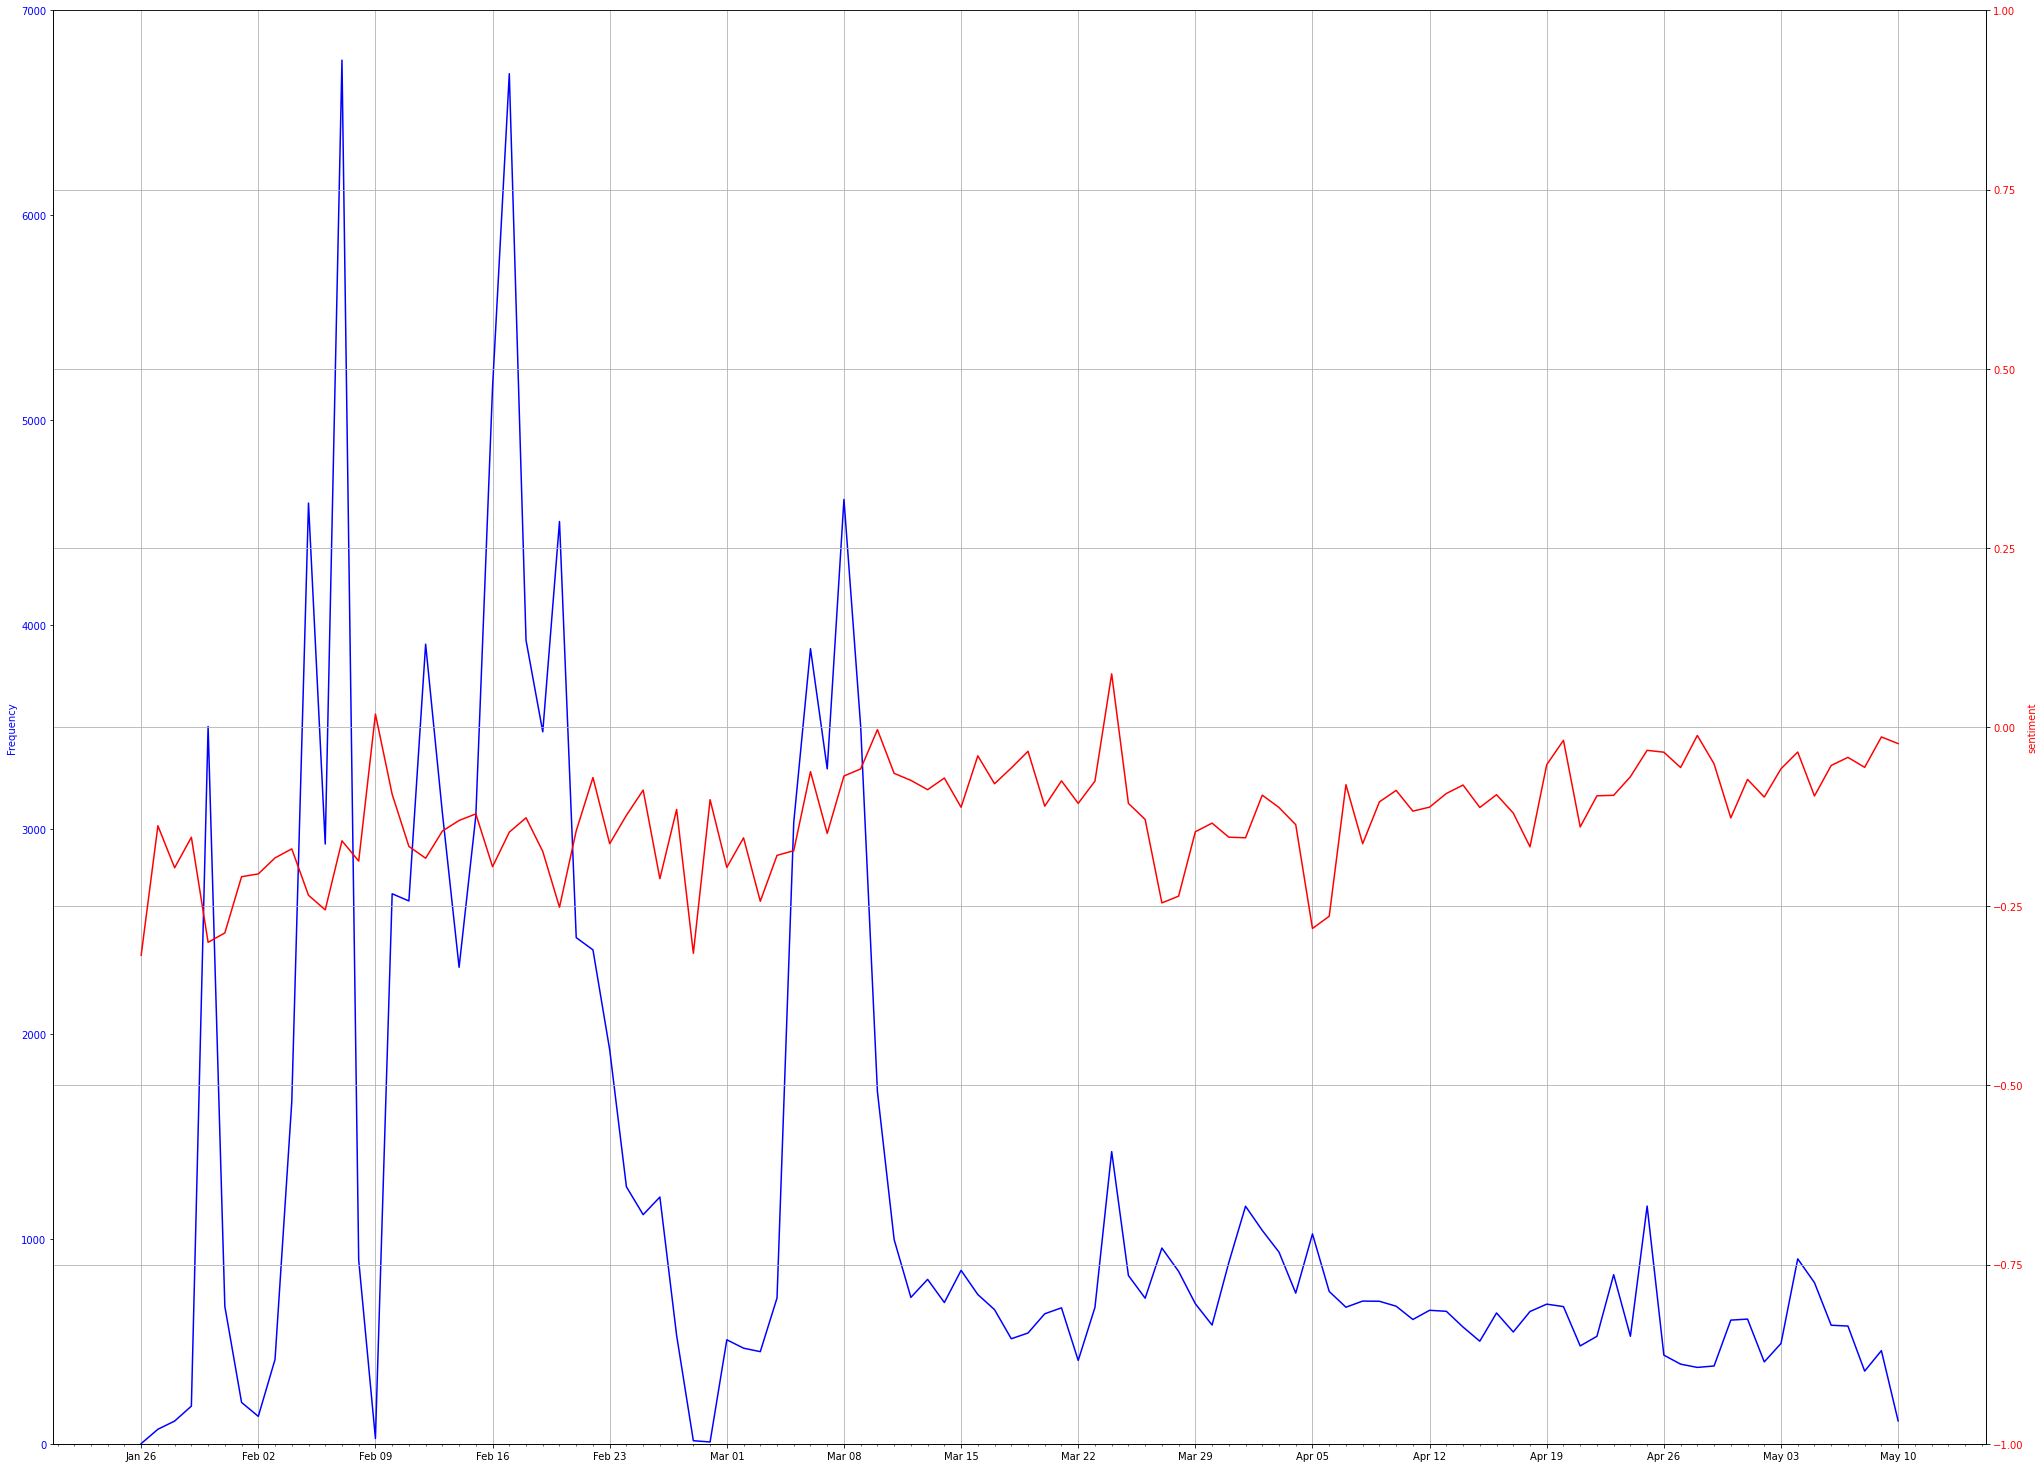

In [21]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
u = sentiment_cruise

color = 'blue'
ax1.set_ylabel('Frequency', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(u, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))


# Sentiment plot of unprocessed tweets only with frequency

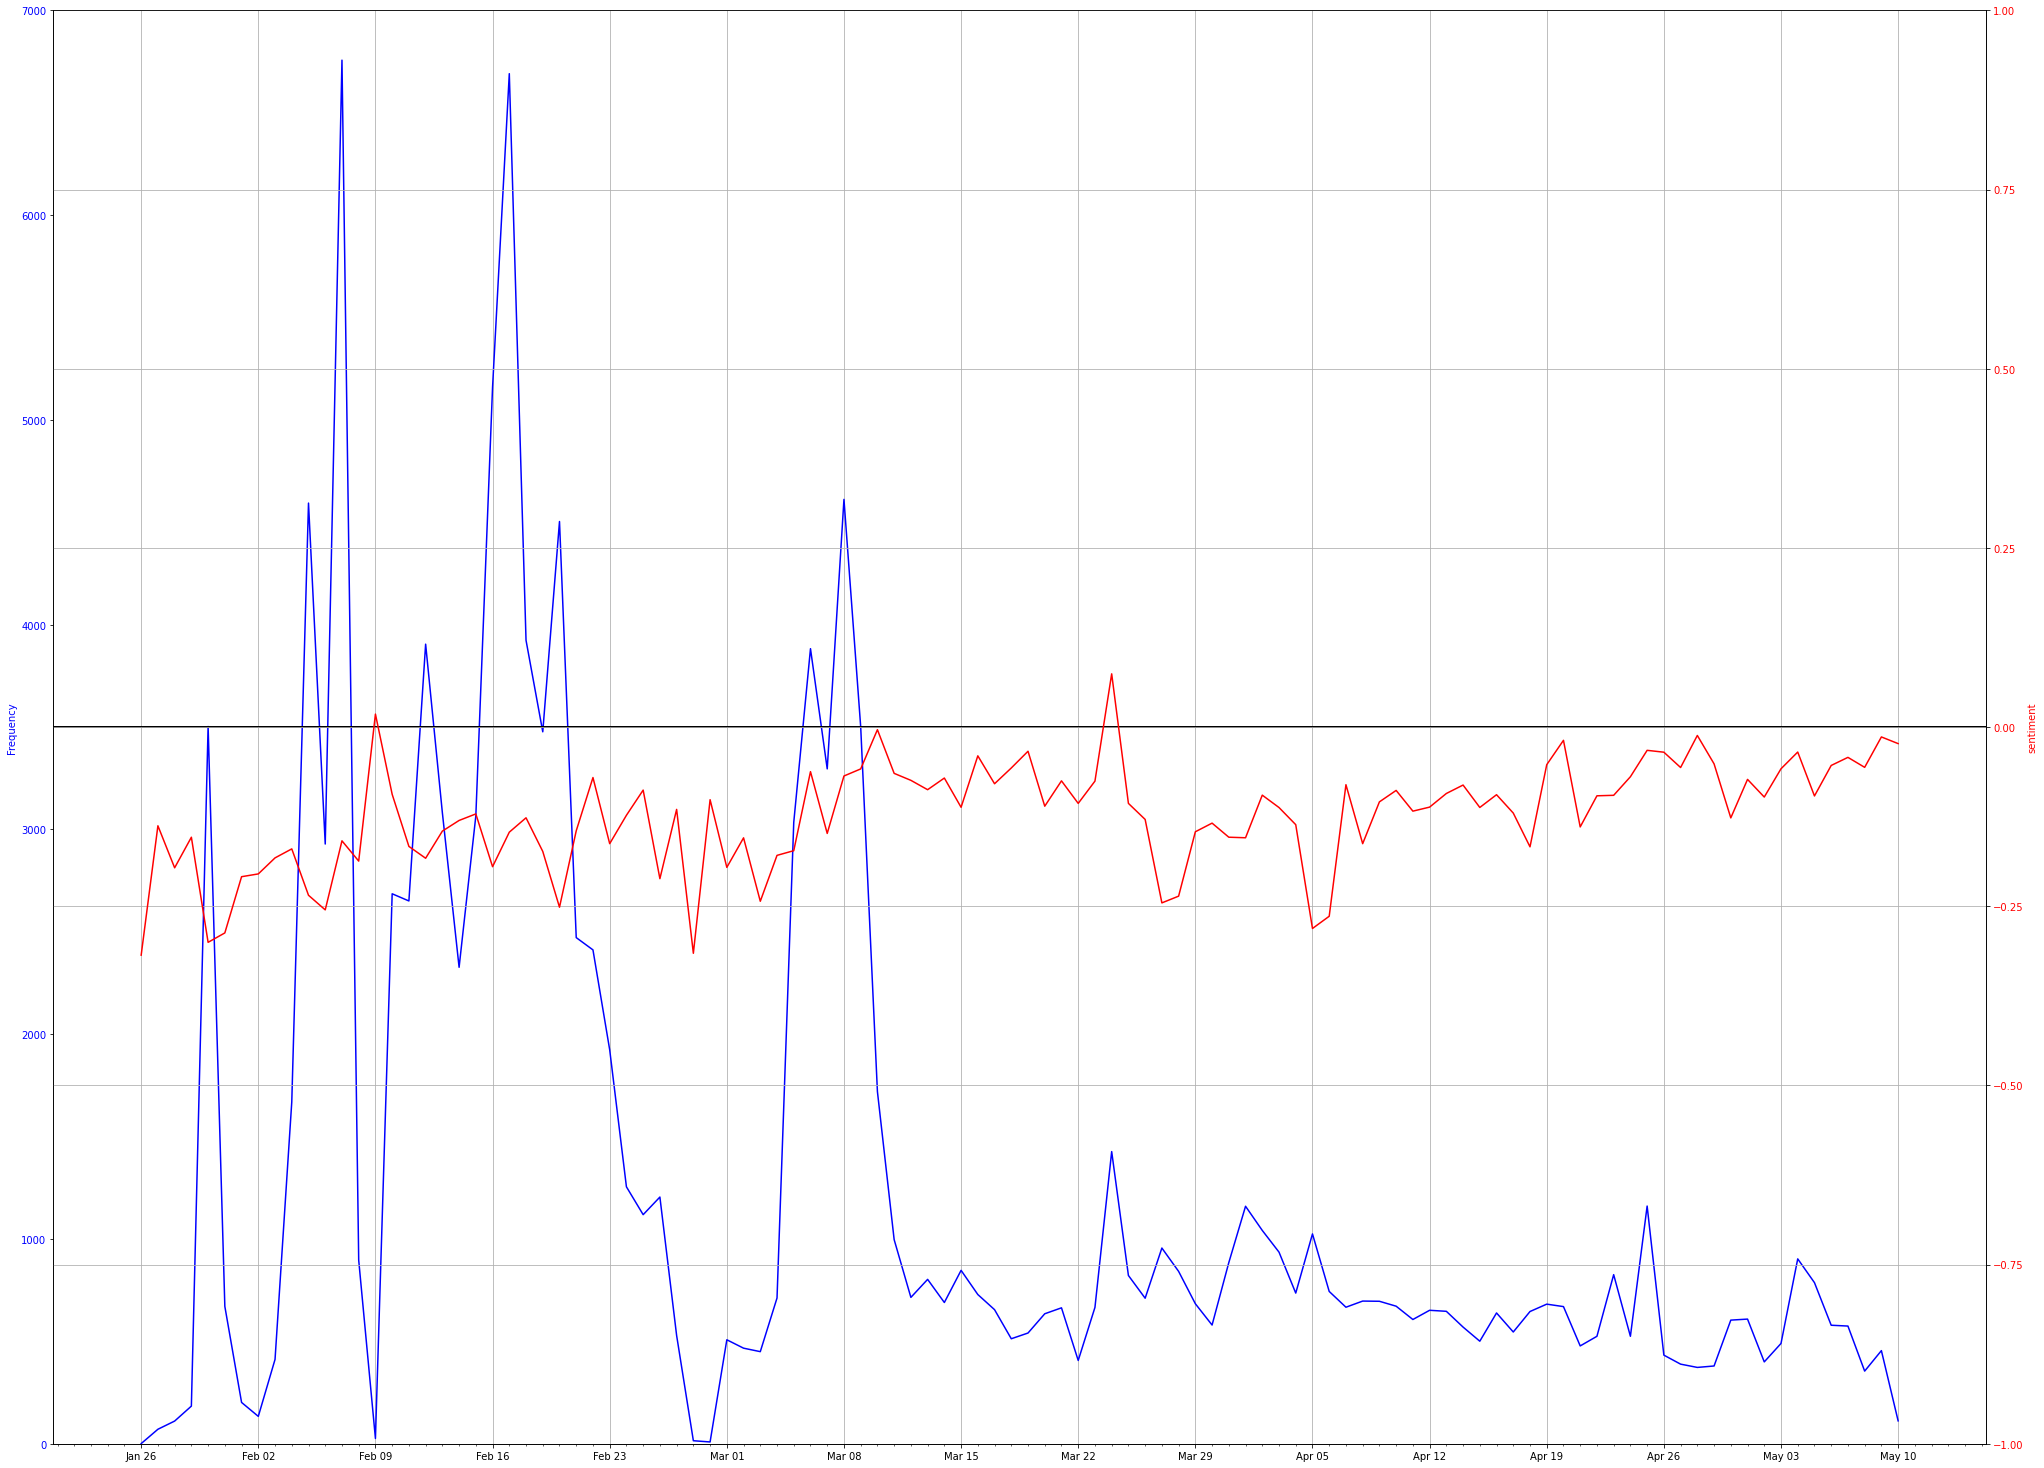

In [22]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
u = sentiment_cruise

color = 'blue'
ax1.set_ylabel('Frequency', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(u, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

# # Sentiment plot of unprocessed & pre-processed tweets with frequency

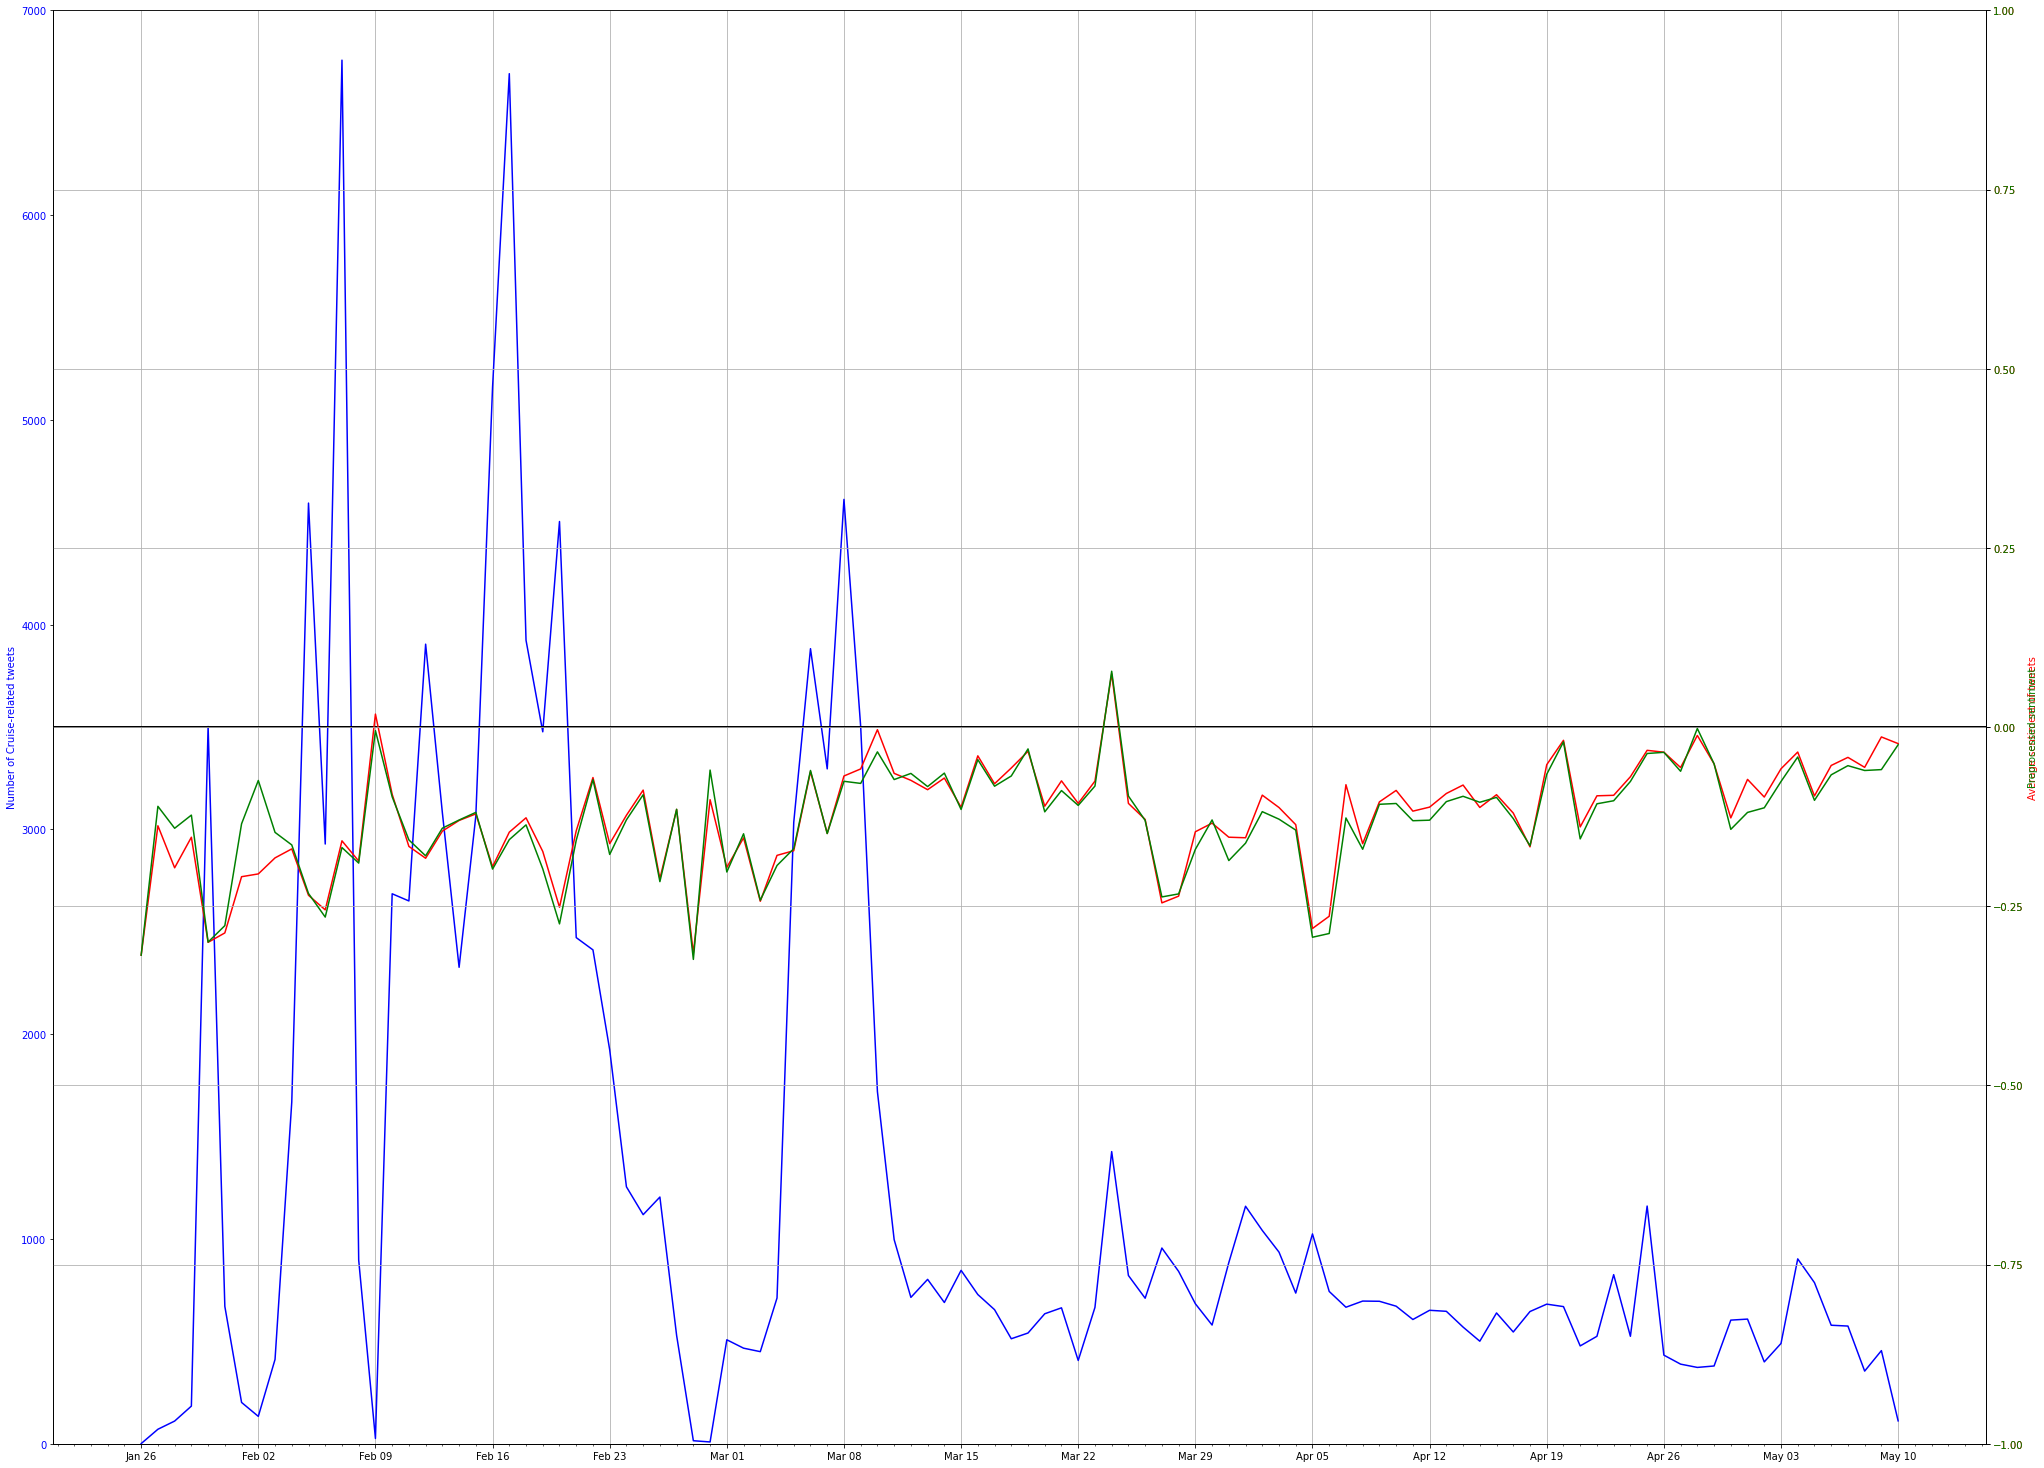

In [23]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
u = sentiment_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of Cruise-related tweets', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(u, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'green'
ax3.set_ylabel('Preprocessed sentiment', color=color)  # we already handled the x-label with ax1
ax3.plot(v, color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

# Sentiment plot of pre-processed tweets only with frequency

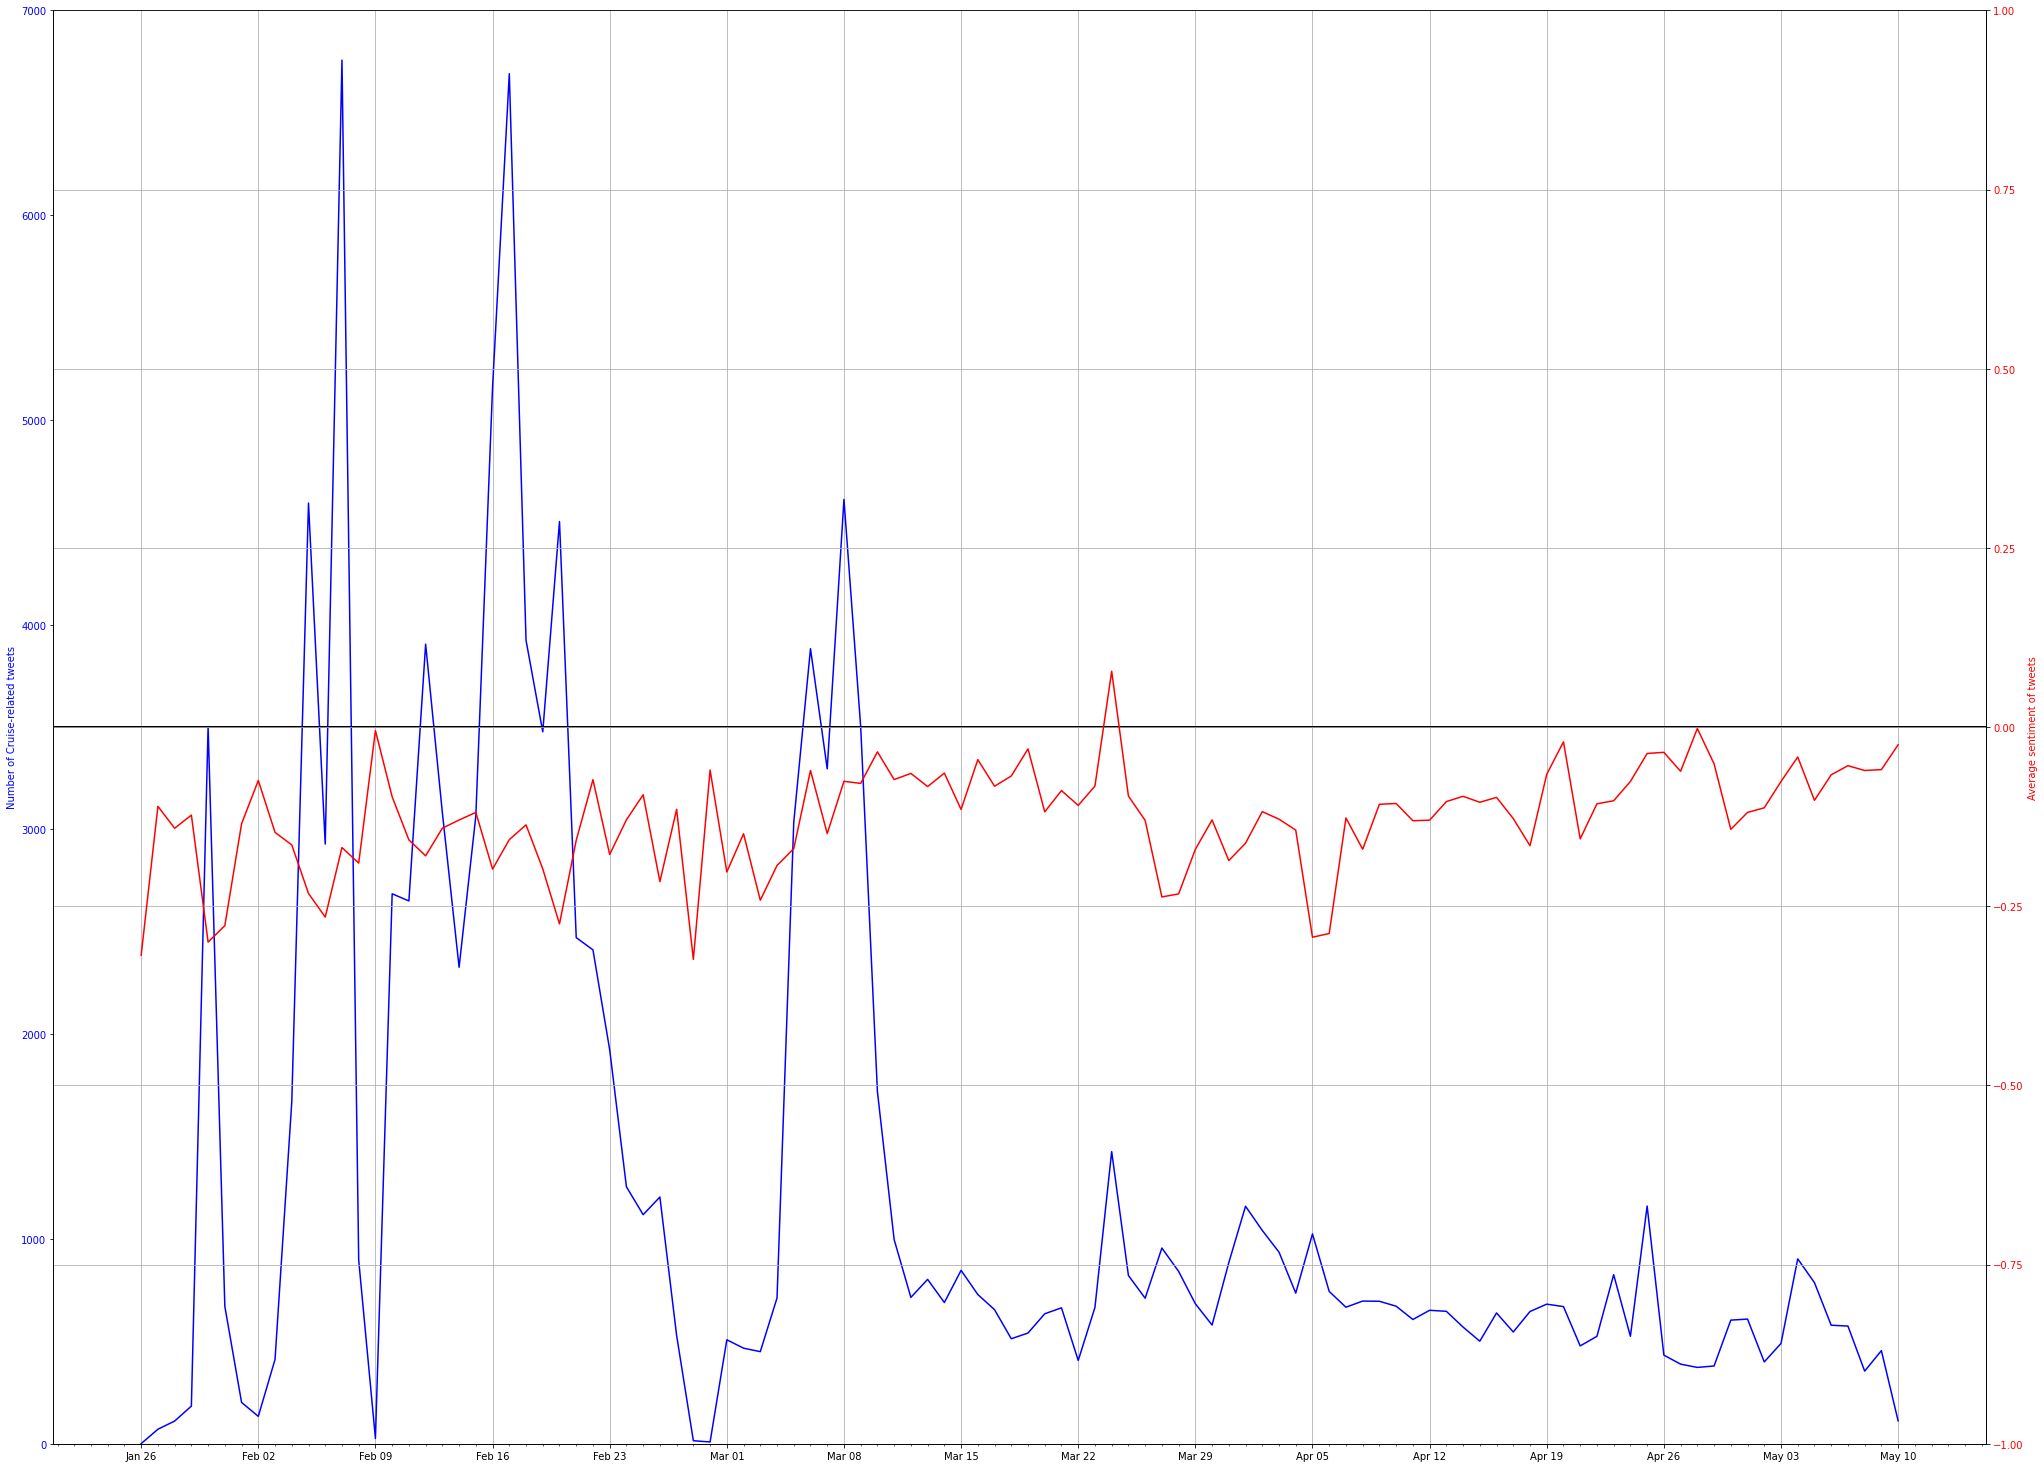

In [24]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of Cruise-related tweets', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

In [25]:
print(np.sum(sentiment_cruise))
print(np.sum(pre_sentiment_cruise))

-13.094612674364853
-13.443313375757604


In [26]:
print(np.sum(pre_sentiment_cruise)-np.sum(sentiment_cruise)) 

-0.348700701392751


# Finishing touches for graph

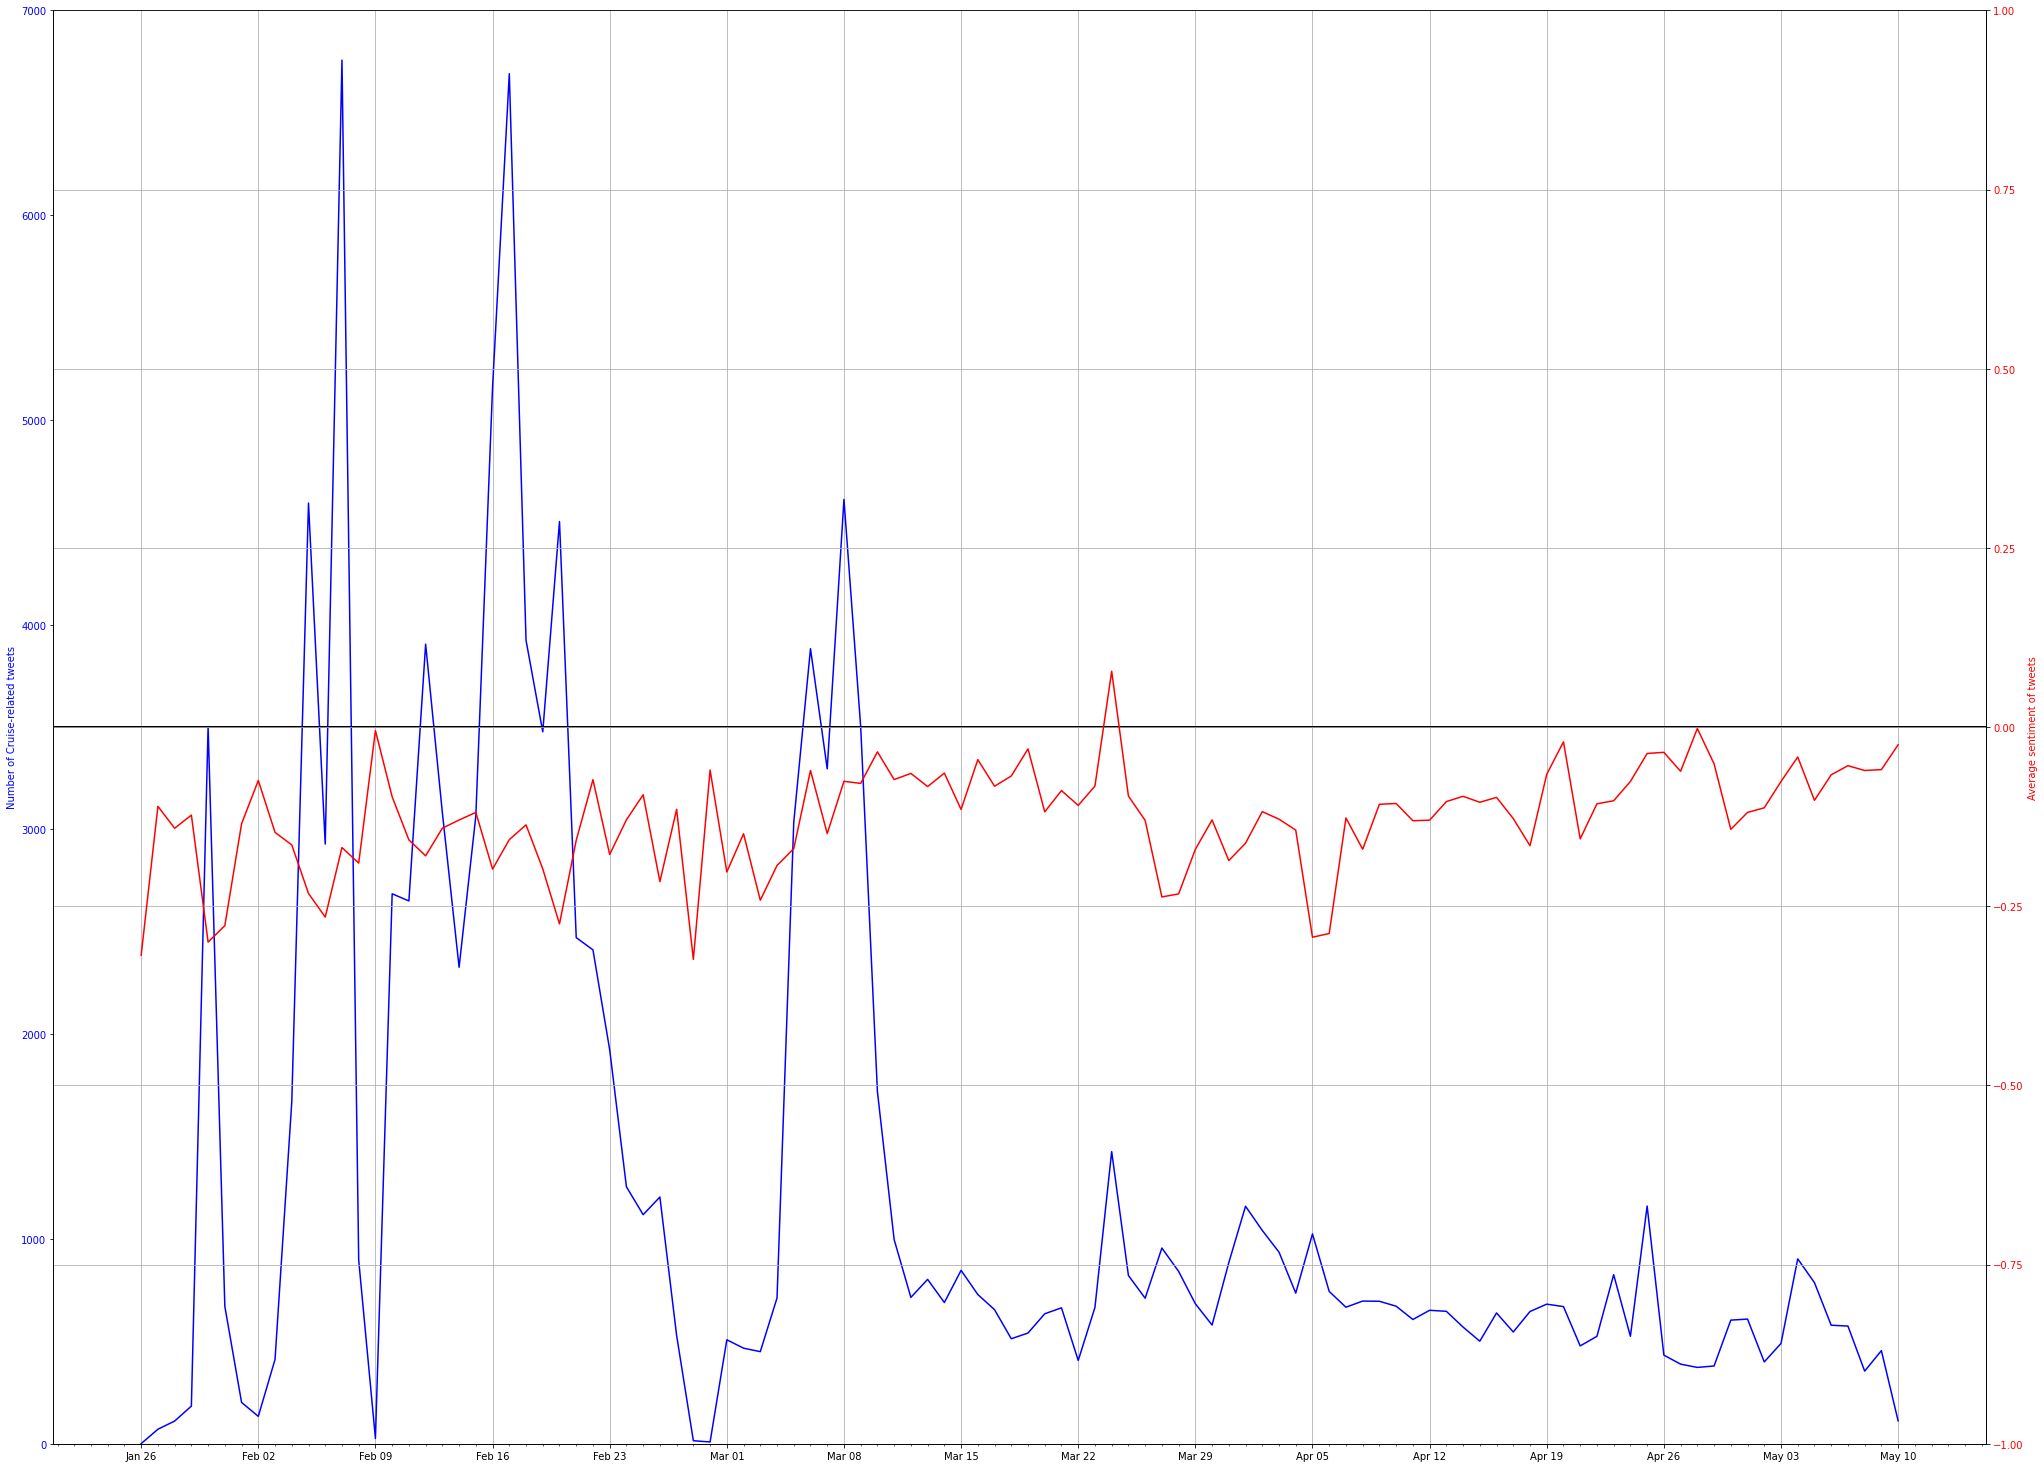

In [27]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of Cruise-related tweets', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 
plt.rcParams.update({'font.size': 20})

## Fontisze adjustment

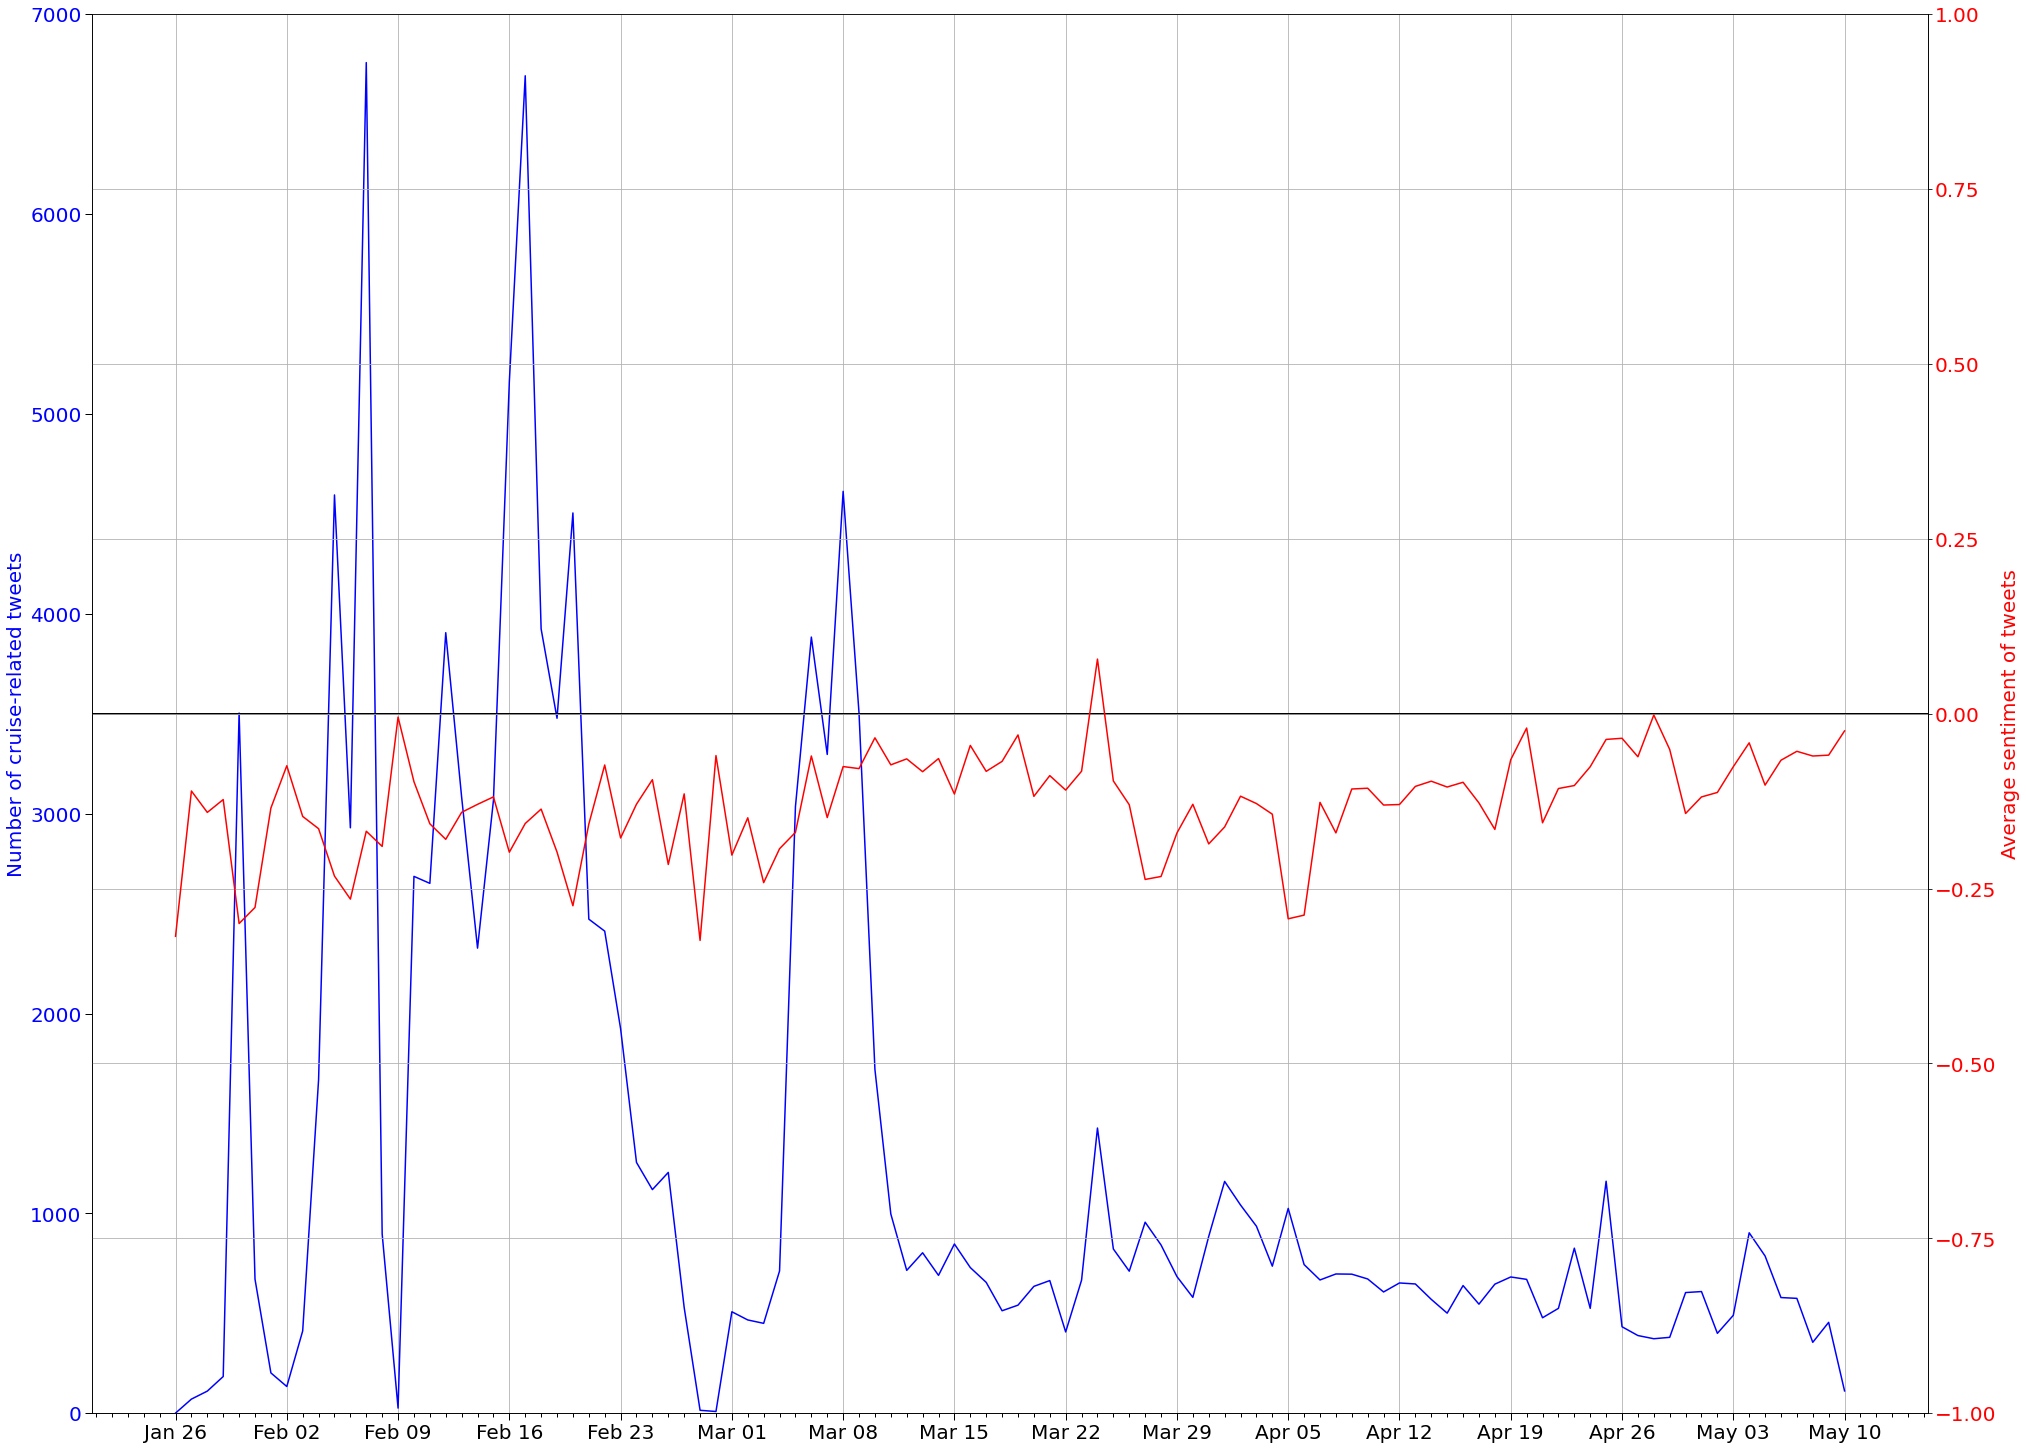

In [28]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22

#plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

Figure size adjustment

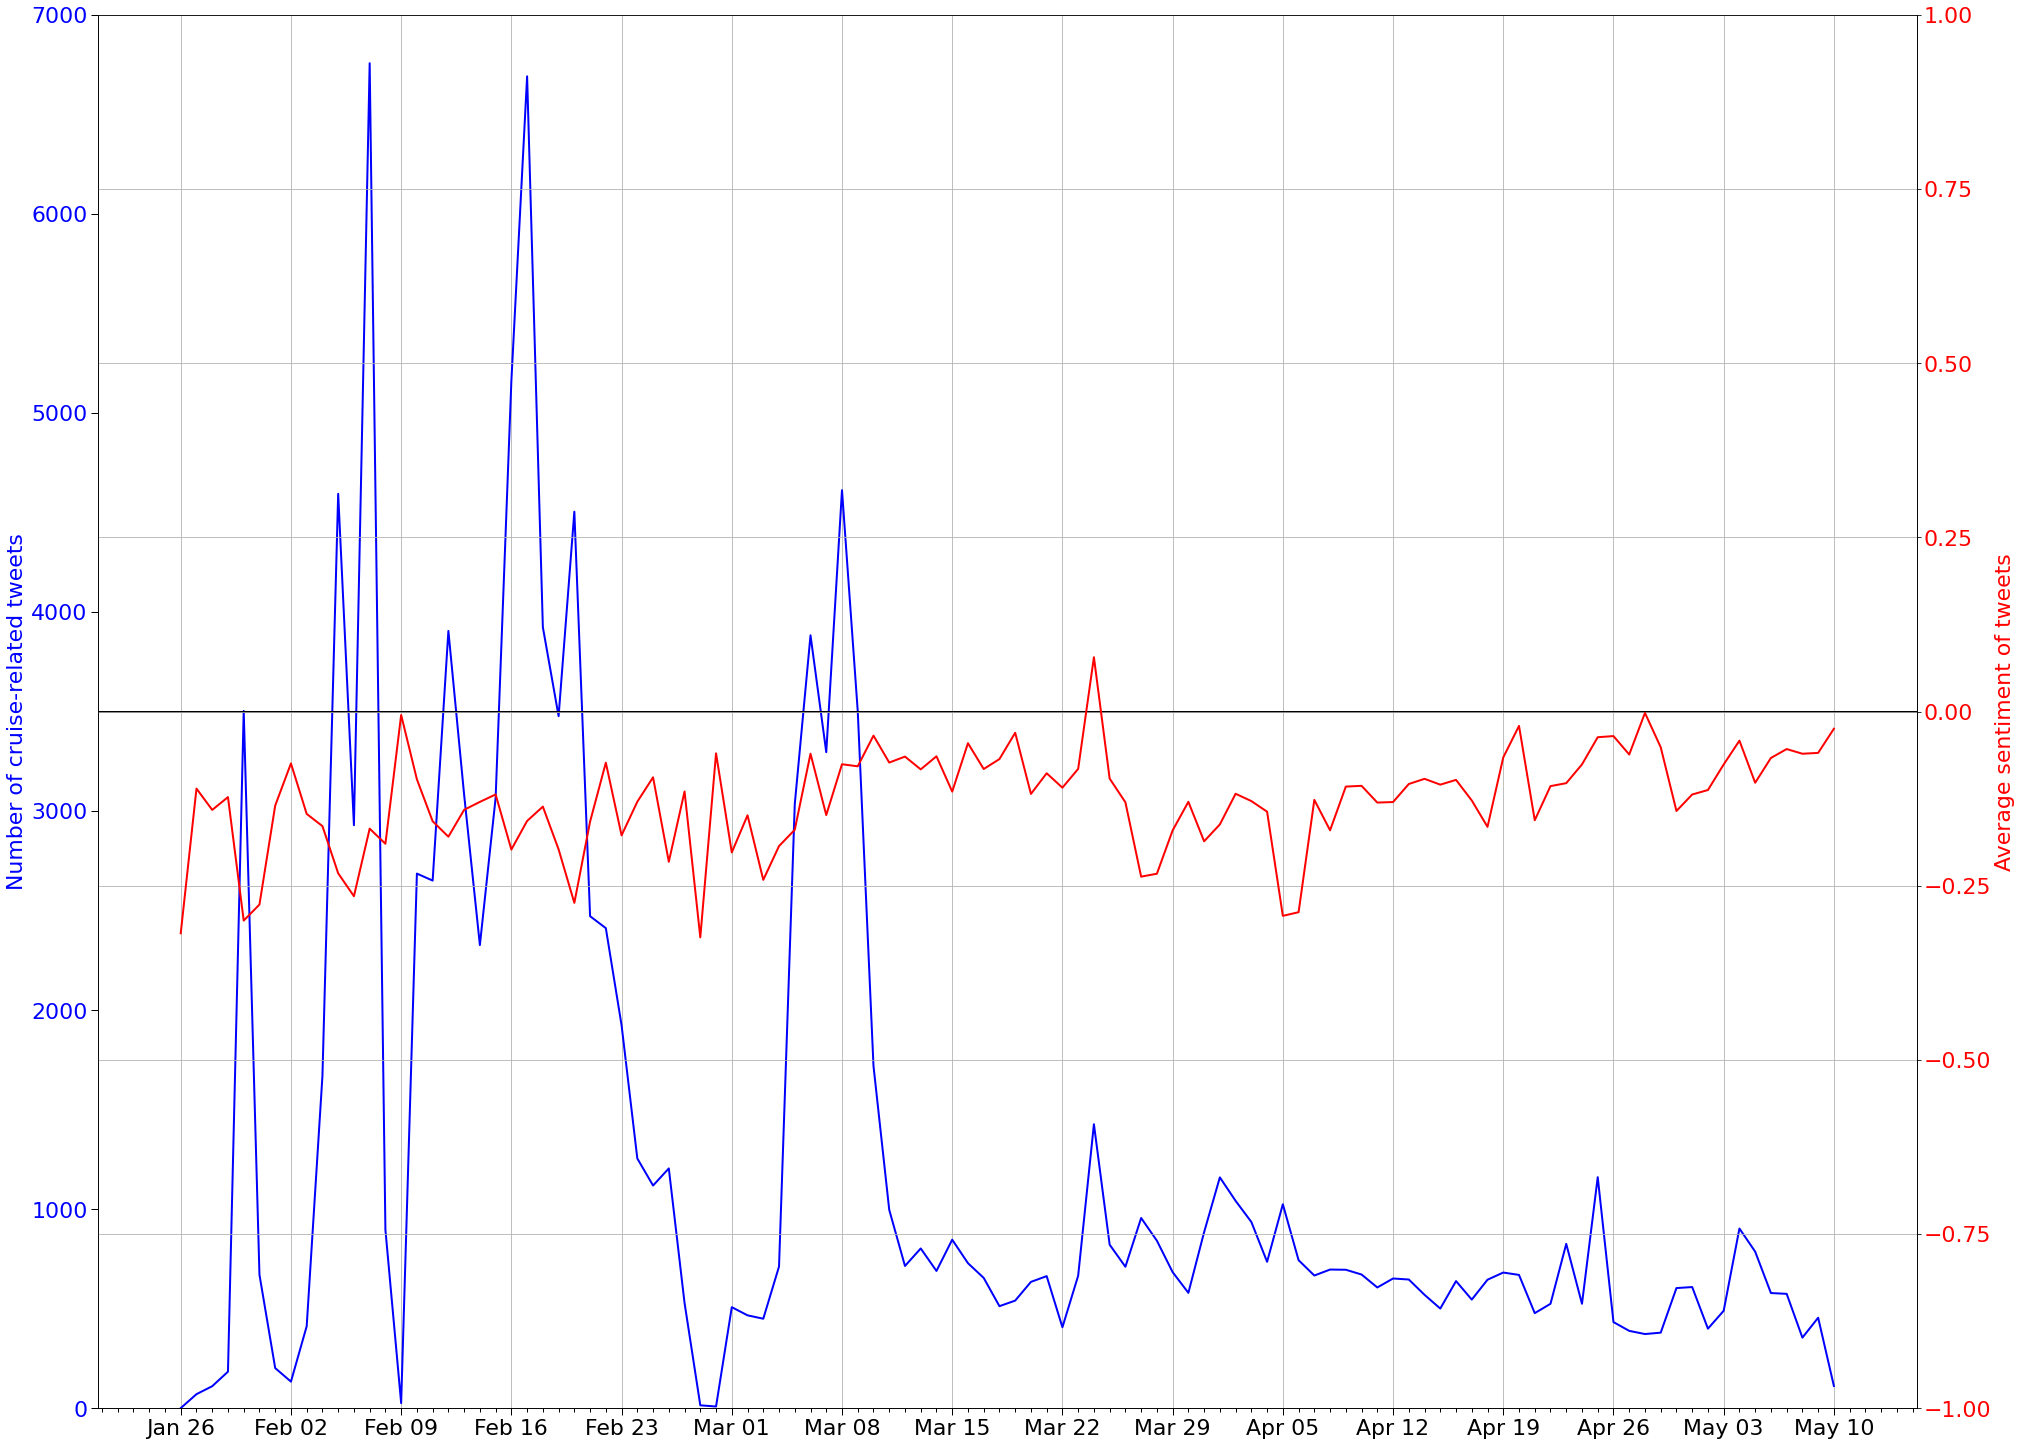

In [29]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


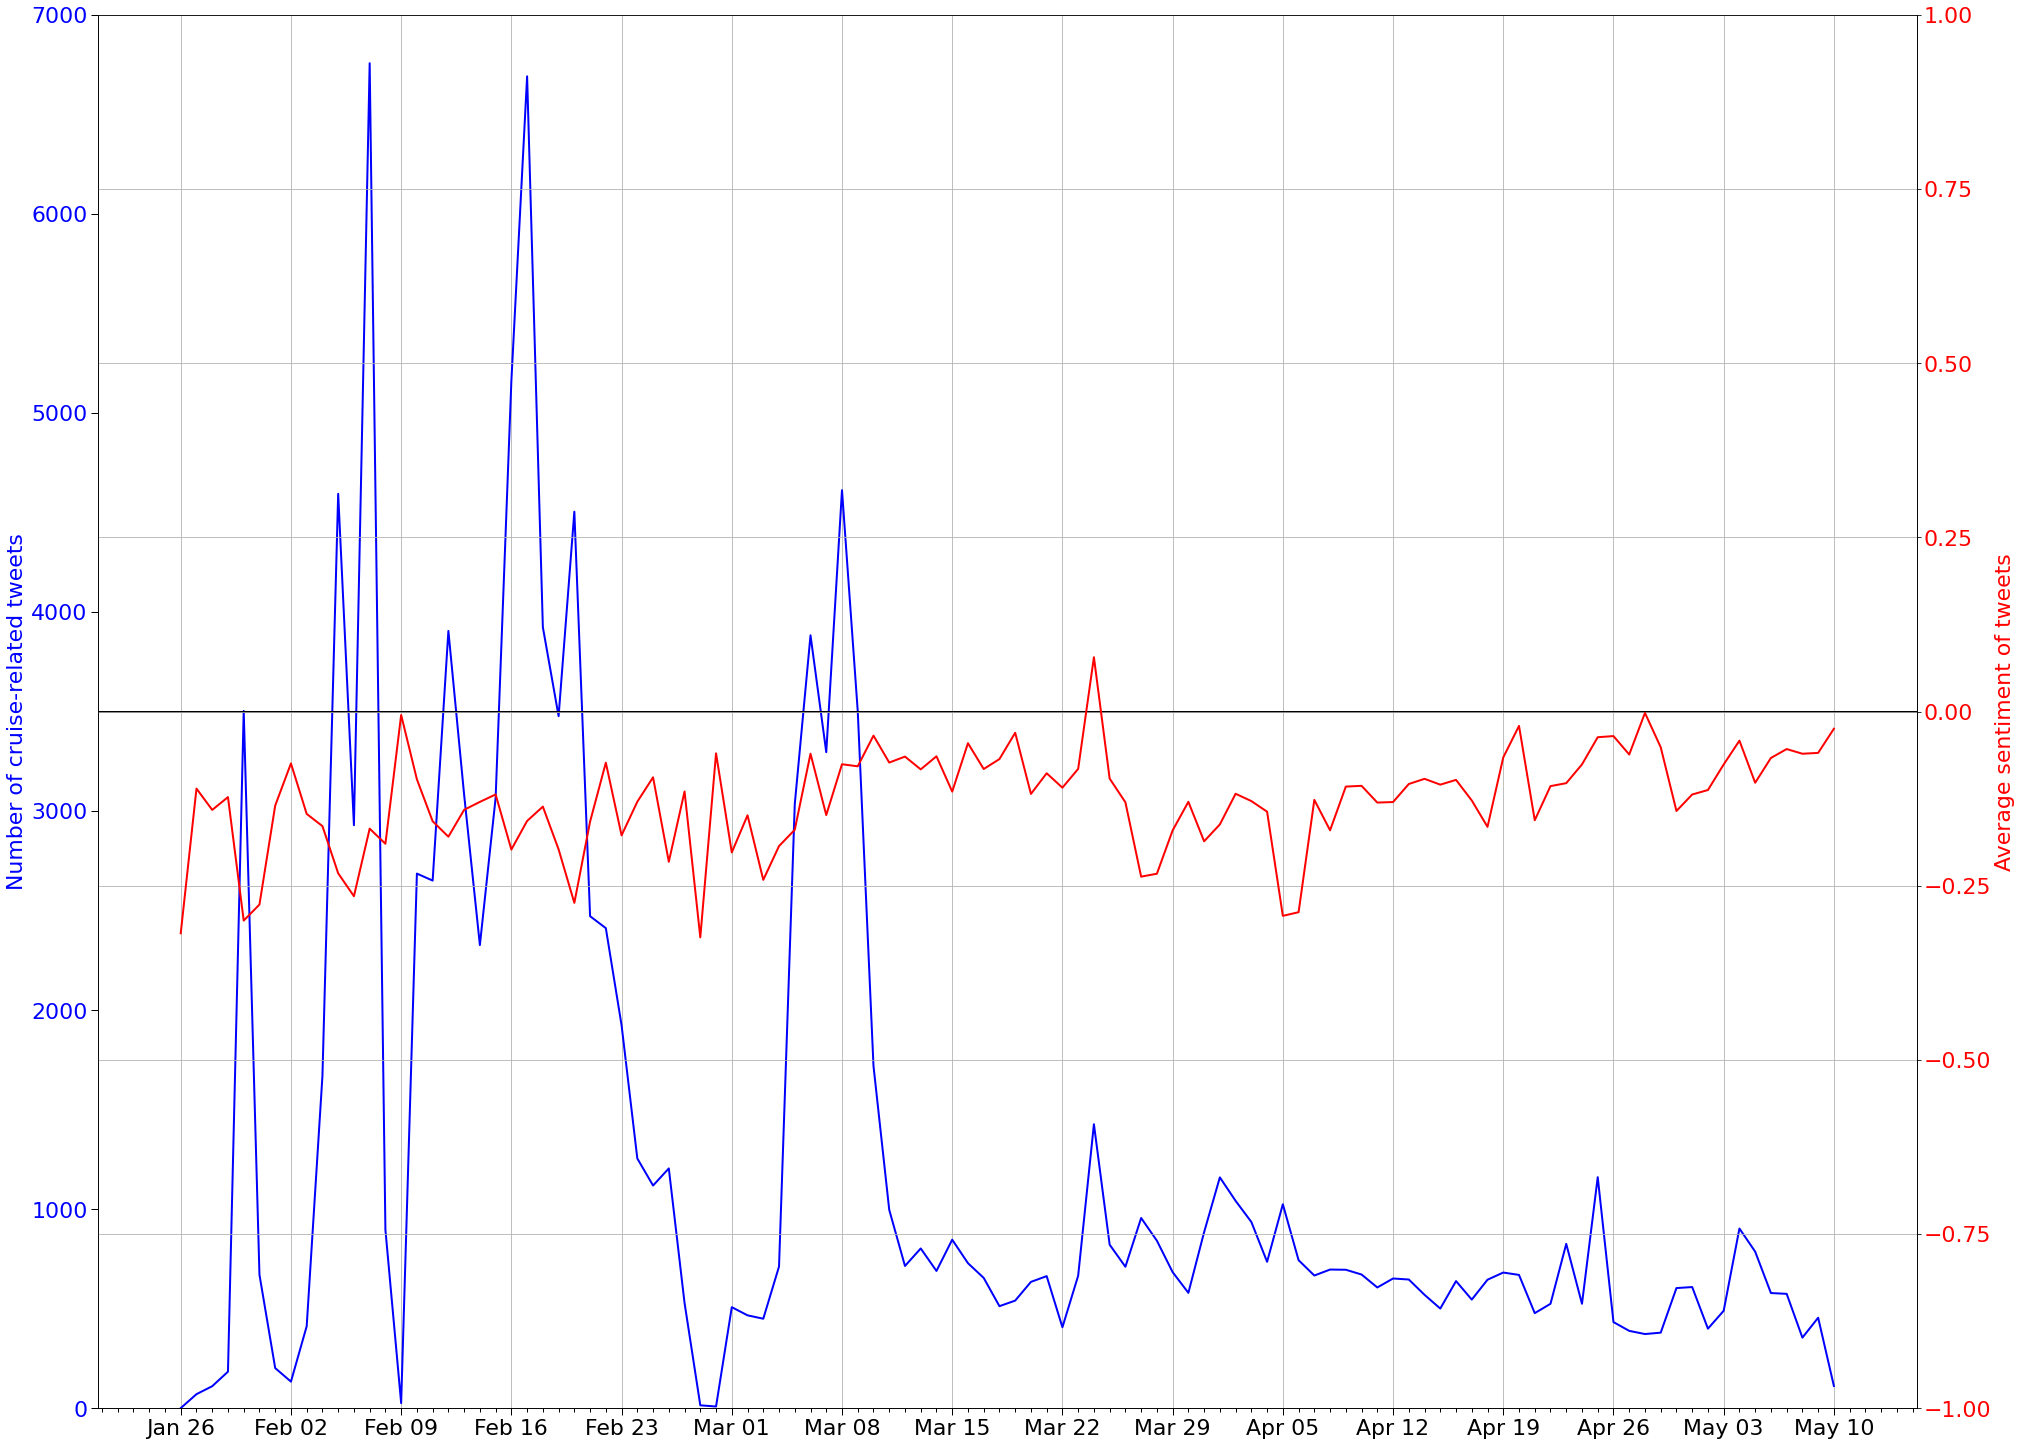

In [30]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


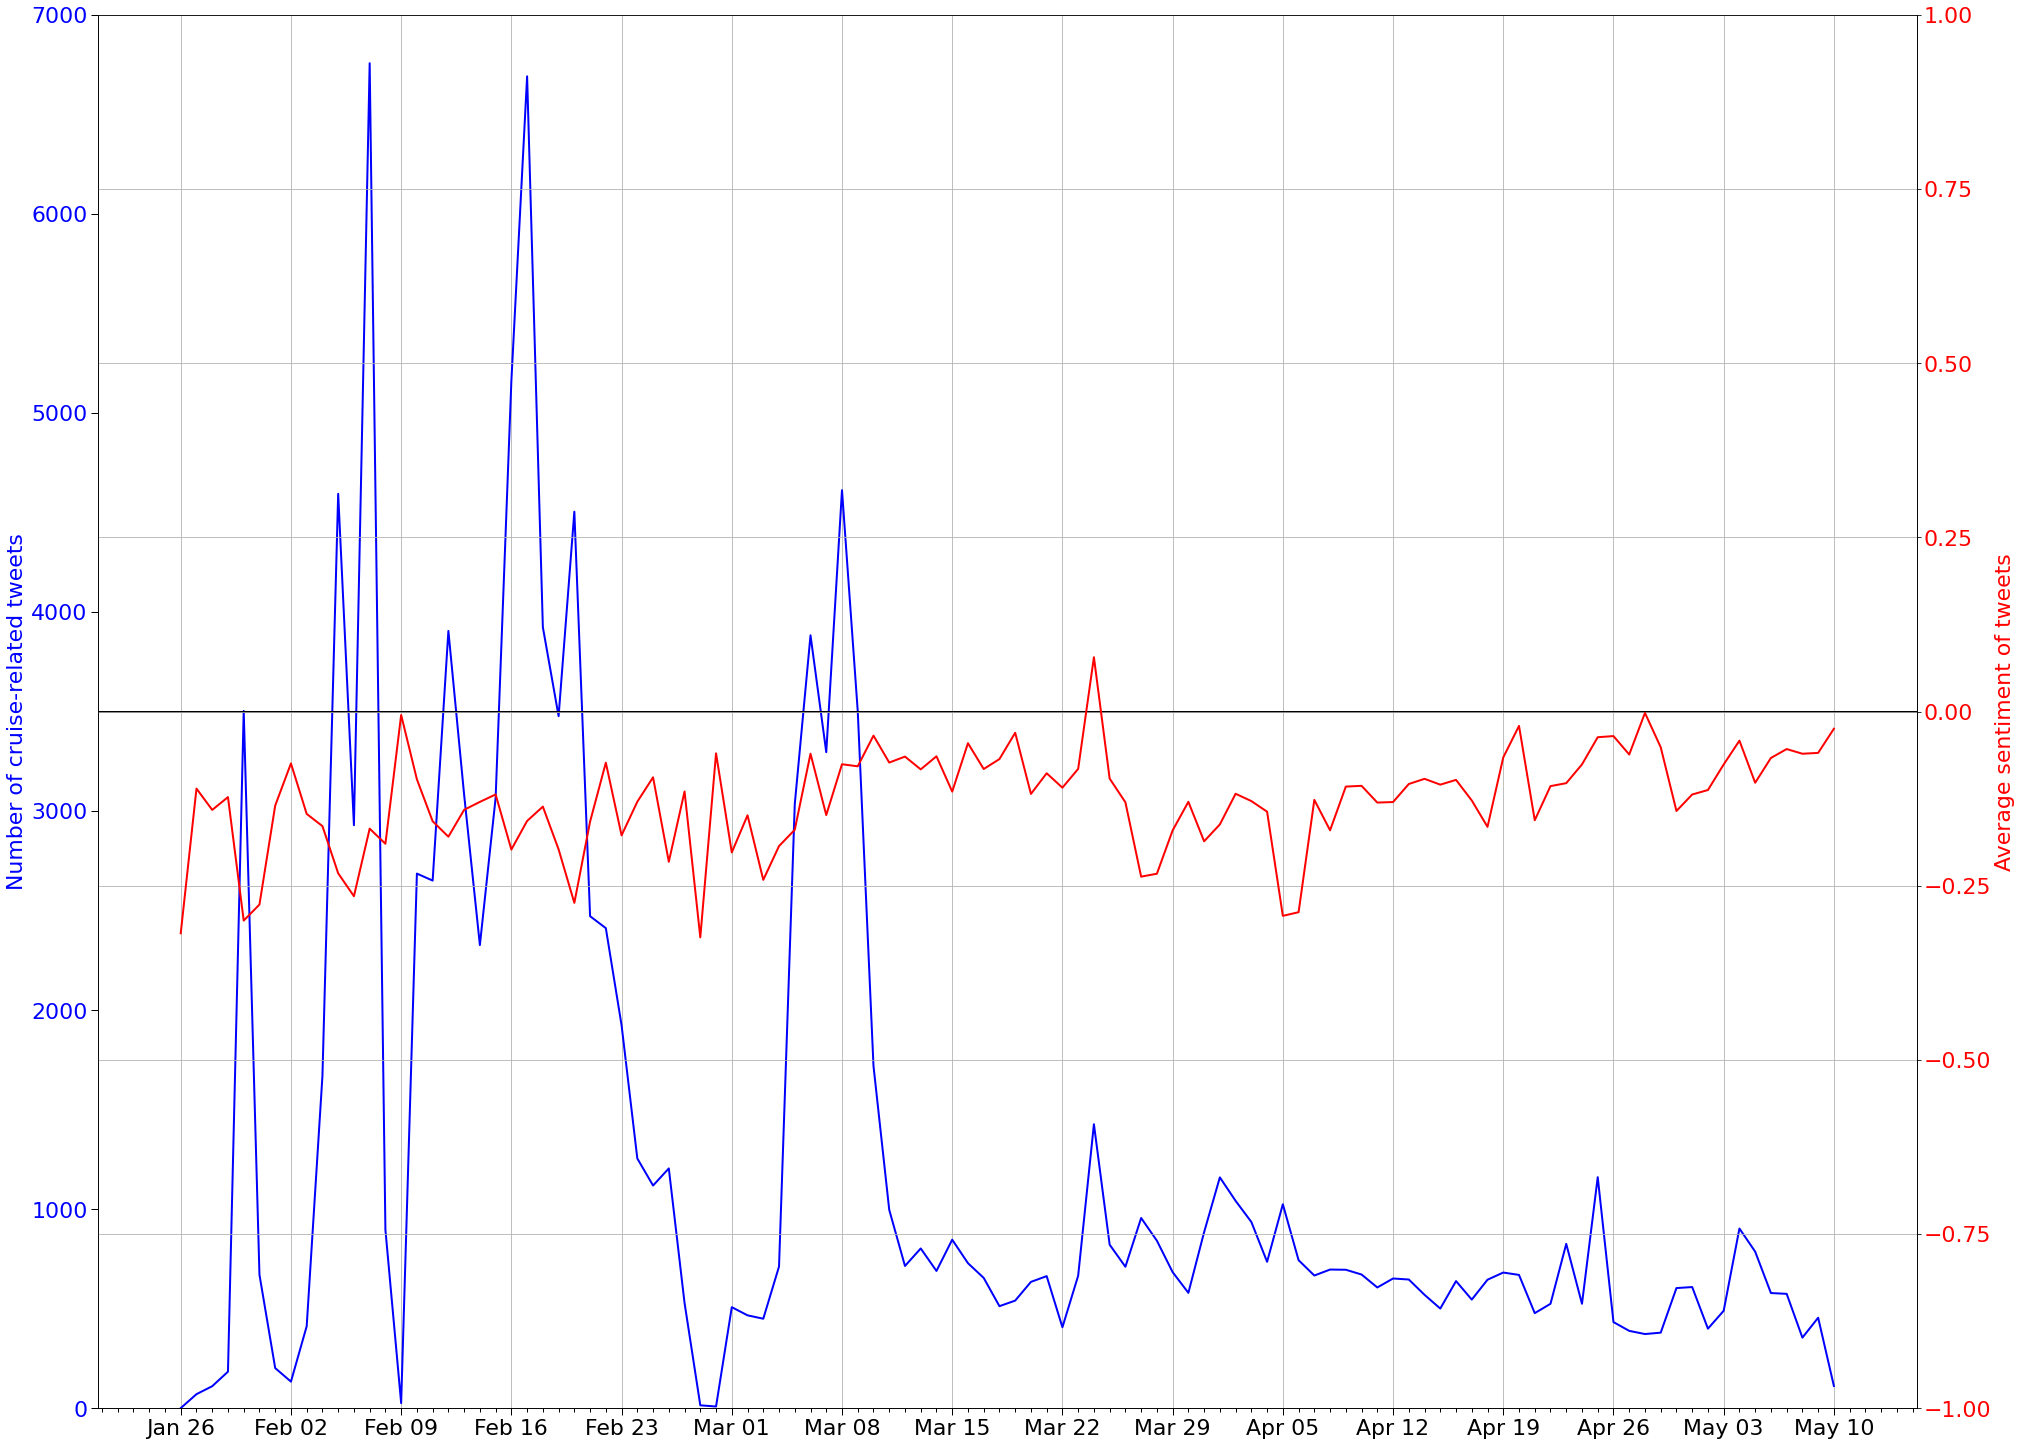

In [31]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)
fig.tight_layout()  # Make the figure use all available whitespace
#fig.savefig('awesome_picture.pdf')

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(True, which='major')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#fig.savefig('awesome_picture.pdf')

## Don't run, too memory intensive

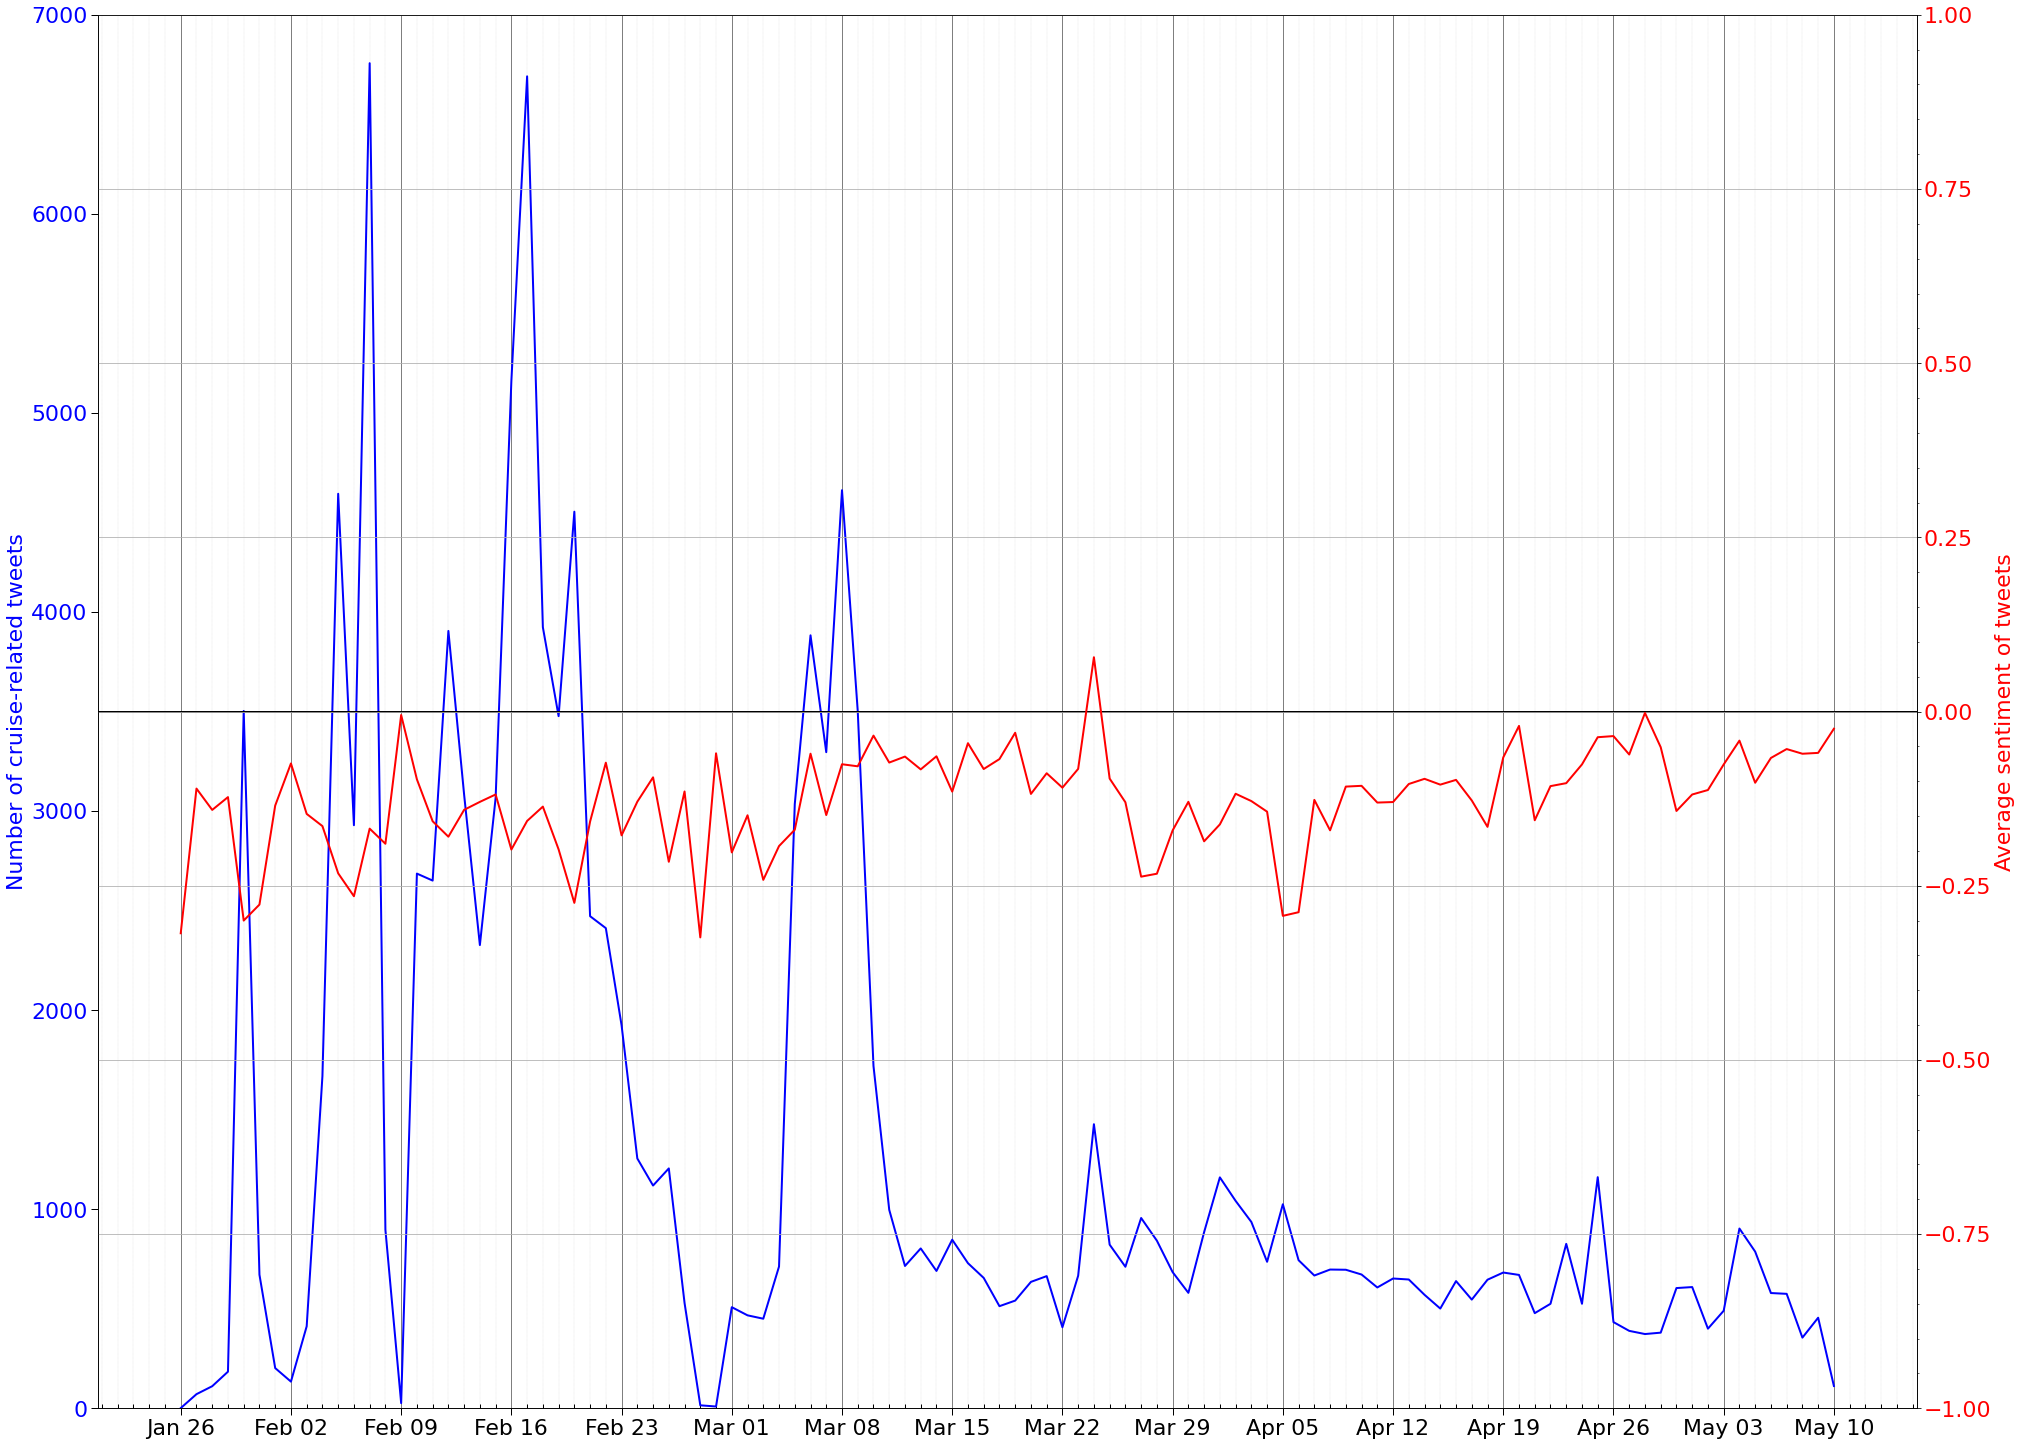

In [32]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)
fig.tight_layout()  # Make the figure use all available whitespace
#fig.savefig('awesome_picture.pdf')

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))
ax1.xaxis.grid(which='minor', linestyle=':', linewidth='0.1', color='black')


ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black', direction='in')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax1.axhline(3500, color ='black', lw = 2) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#fig.savefig('better_picture.pdf')

# Thinner line at neutral/zero

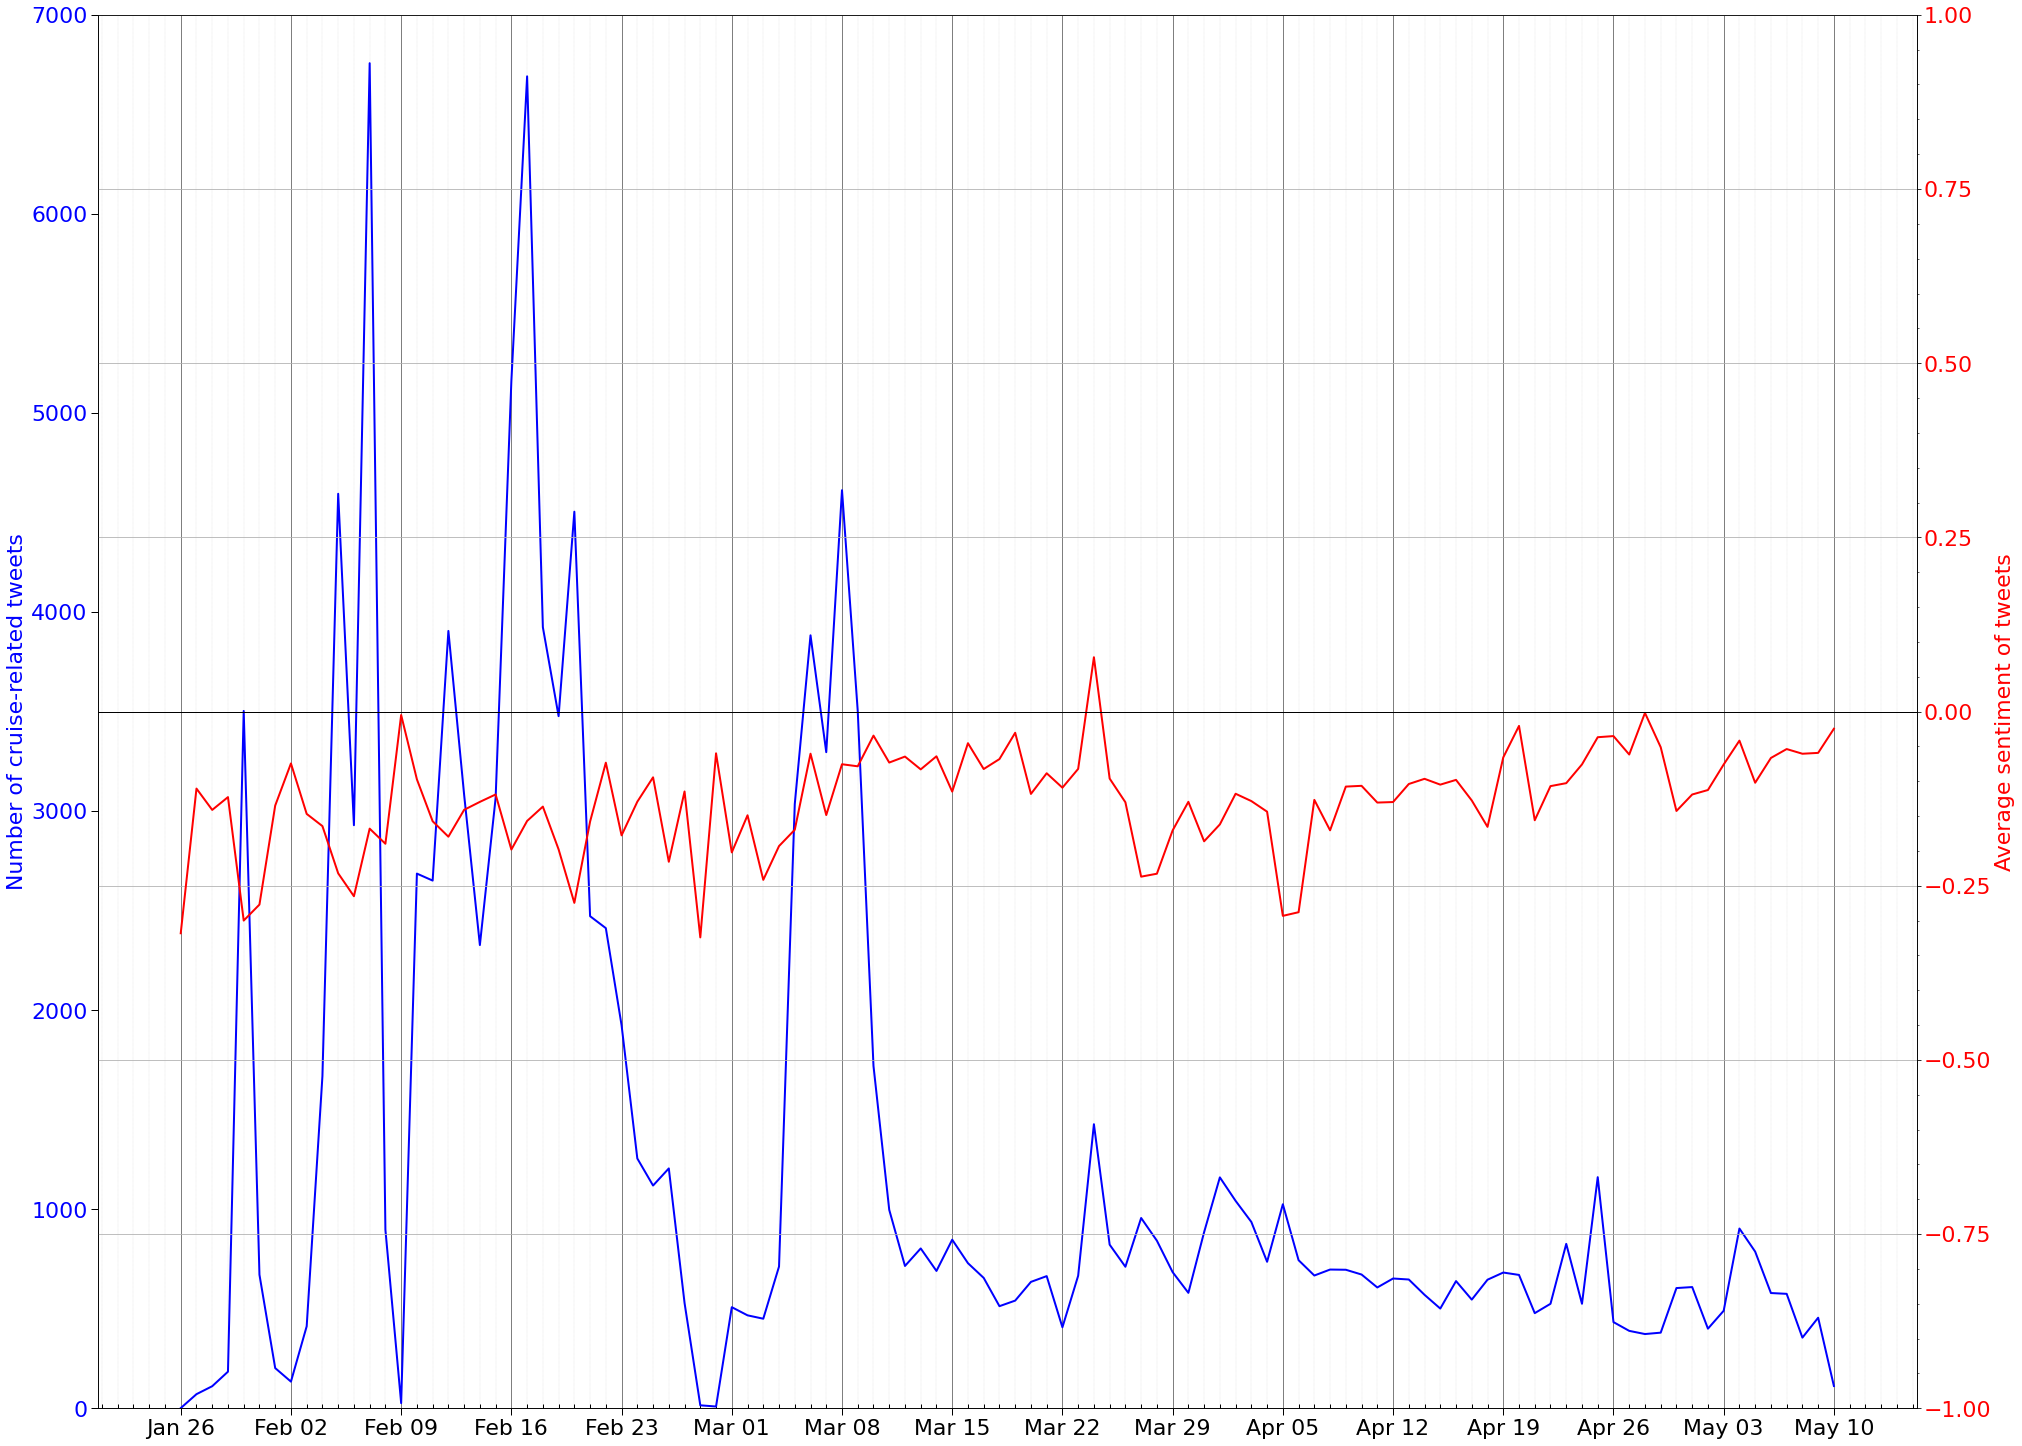

In [33]:
fig, ax1 = plt.subplots()
fig.set_size_inches(28.5,20.5)
fig.tight_layout()  # Make the figure use all available whitespace
#fig.savefig('awesome_picture.pdf')

t = sum_cruise
v = pre_sentiment_cruise

color = 'blue'
ax1.set_ylabel('Number of cruise-related tweets', color=color)
ax1.plot(t, color=color, linewidth=2.0)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'red'
ax2.set_ylabel('Average sentiment of tweets', color=color)  # we already handled the x-label with ax1
ax2.plot(v, color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1,1)
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(b=True, which=u'major')

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter())
ax1.set_ylim(0,7000)
ax1.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax1.xaxis.set_minor_locator(AutoMinorLocator(7))
ax1.xaxis.grid(which='minor', linestyle=':', linewidth='0.1', color='black')


ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, color='black', direction='in')


import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.collections as collections 
ax2.axhline(0, color ='black', lw = 1) 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22


plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#fig.savefig('better_picture.pdf')

In [34]:
fig.savefig('see4.png')

In [35]:
# store to file
fig.savefig("see4.eps")